> Created on Tue Dec 29 10:12:57 2020 @author: Richie Bao-caDesign设计(cadesign.cn)

## 1. [Hierarchical Multi-Scale Attention for Semantic Segmentation](https://github.com/NVIDIA/semantic-segmentation)解析，图像分割与提取城市特征信息
### 1.1 [Hierarchical Multi-Scale Attention for Semantic Segmentation](https://github.com/NVIDIA/semantic-segmentation)解析


In [1]:
import util
from pathlib import Path
app_root=r'C:\Users\richi\omen-richiebao_s\omen_code\sementic_ref\semantic-segmentation-main'
paths = util.DisplayablePath.make_tree(Path(app_root))
for path in paths:
    print(path.displayable())

semantic-segmentation-main/
├── .runx
├── config.py
├── datasets/
│   ├── __init__.py
│   ├── base_loader.py
│   ├── cityscapes.py
│   ├── cityscapes_labels.py
│   ├── mapillary.py
│   ├── nullloader.py
│   ├── randaugment.py
│   ├── sampler.py
│   ├── uniform.py
│   └── utils.py
├── Dockerfile
├── imgs/
│   ├── composited_sf.png
│   └── test_imgs/
│       ├── nyc.jpg
│       └── sf.jpg
├── LICENSE
├── loss/
│   ├── optimizer.py
│   ├── radam.py
│   ├── rmi.py
│   ├── rmi_utils.py
│   └── utils.py
├── network/
│   ├── __init__.py
│   ├── attnscale.py
│   ├── basic.py
│   ├── bn_helper.py
│   ├── deeper.py
│   ├── deepv3.py
│   ├── hrnetv2.py
│   ├── mscale.py
│   ├── mscale2.py
│   ├── mynn.py
│   ├── ocr_utils.py
│   ├── ocrnet.py
│   ├── Resnet.py
│   ├── SEresnext.py
│   ├── utils.py
│   ├── wider_resnet.py
│   └── xception.py
├── PREPARE_DATASETS.md
├── README.md
├── requirements.txt
├── scripts/
│   ├── dump_cityscapes.yml
│   ├── dump_folder.yml
│   ├── eval_cityscapes.yml
│   ├─

---

**知识点-01：**`super().__init__()`——继承父类的`init`方法

通过下述实例理解继承父类的方法，对于子类`Child_robin`虽然继承了父类，可以调用父类的方法（函数），但是因为子类自身的__init__初始化，覆盖了父类的属性，因此无法调用父类属性。对于子类` Child_sparrow`，增加了`super().__init__()`方法，从而可以调用父类属性。

In [20]:
class Parent:
    def __init__(self,name="bird"):
        self.name=name
        
class Child_robin(Parent):
    def __init__(self,species="robin"):
        self.species=species
        
class Child_sparrow(Parent):
    def __init__(self,species="sparrow"):
        self.species=species
        super(Child_sparrow,self).__init__()
        
p=Parent()
print("获取Parent类属性：name=%s"%p.name)
print("_"*50)
c_r=Child_robin()
print("获取子类Child_robin的属性：species=%s"%c_r.species)
try:
    print("获取父类Parent属性：name=%s"%c_r.name)
except AttributeError as error:
    print(error)
print("_"*50)
c_s=Child_sparrow()
print("获取子类Child_sparrow的属性：species=%s"%c_s.species)
print("获取父类Parent属性：name=%s"%c_s.name)

获取Parent类属性：name=bird
__________________________________________________
获取子类Child_robin的属性：species=robin
'Child_robin' object has no attribute 'name'
__________________________________________________
获取子类Child_sparrow的属性：species=sparrow
获取父类Parent属性：name=bird


**知识点-02：**`__getattr__`,`__setattr__`,`__delattr__`

类Class_A的实例(instance)C_A，通过`C_A.attri_a`访问实例属性attri_a（对象变量），并返回属性对应值；通过实例的`C_A.__dict__`可以查看所有实例的属性（即实例的属性存储在__dict__中）。如果预提取实例中不存在的属性，则会调用`__getattri__`。如果类的变量（属性）定义在初始化函数外部，例如attri_c(类变量)，则实例的`C_A.__dict__`并不包含该属性，但是在类自身的`Class_A.__dict__`对象中包含该属性。

在实例初始化、重新赋值，以及增加新的属性时均会自动调用`__setattr__`方法，并用`self.__dict__[name]=value`语句，把属性键值对保存在__dict__对象中。其中` __setattr__(self,name,value)`的参数'name'和'value'为固定参数，代表属性的键值对。

如果要删除实例的属性键值对，则可以执行`del C_A.attri_d`，调用`__delattr__`，用`del self.__dict__[name]`方法删除属性键值对。

In [15]:
class Class_A:
    attri_c="attri_C"
    def __init__(self,attri_a,attri_b):
        self.attri_a=attri_a
        self.attri_b=attri_b
        
    def __getattr__(self,attri):
        return('invoke __getattr__',attri)
    
    def __setattr__(self,name,value):
        print("invoke __setattr__",)
        self.__dict__[name]=value
        
    def __delattr__(self,name):
        print("invoke __delattr__",)
        print("deleting `{}`".format(str(name)))
        try:
            del self.__dict__[name]
            print ("`{}` deleted".format(str(name)))
        except KeyError as k:
            return None
                       
    
C_A=Class_A("attri_A","attri_B")
print("实例C_A包含的属性及其值：",C_A.__dict__)
print("实例C_A已有属性attri_a，则直接返回该属性对应值，不会调用__getattr__，attri_a=",C_A.attri_a)
print("实例C_A没有属性attri_none,则调用__getattr__：",C_A.attri_none)
print(Class_A.__dict__)
print("用类的实例C_A提取属性attri_c=%s"%C_A.attri_c,";" "用类自身Class_A直接提取属性attri_c=%s"%Class_A.attri_c)
print("_"*50)
C_A.attri_b="attri_B_assignment"
print("对已有属性重新赋值：",C_A.__dict__)
C_A.attri_d="attri_D"
print("增加新的属性，并赋值：",C_A.__dict__)

invoke __setattr__
invoke __setattr__
实例C_A包含的属性及其值： {'attri_a': 'attri_A', 'attri_b': 'attri_B'}
实例C_A已有属性attri_a，则直接返回该属性对应值，不会调用__getattr__，attri_a= attri_A
实例C_A没有属性attri_none,则调用__getattr__： ('invoke __getattr__', 'attri_none')
{'__module__': '__main__', 'attri_c': 'attri_C', '__init__': <function Class_A.__init__ at 0x0000029185C09B80>, '__getattr__': <function Class_A.__getattr__ at 0x0000029185C09280>, '__setattr__': <function Class_A.__setattr__ at 0x0000029185C09670>, '__delattr__': <function Class_A.__delattr__ at 0x0000029185C11160>, '__dict__': <attribute '__dict__' of 'Class_A' objects>, '__weakref__': <attribute '__weakref__' of 'Class_A' objects>, '__doc__': None}
用类的实例C_A提取属性attri_c=attri_C ;用类自身Class_A直接提取属性attri_c=attri_C
__________________________________________________
invoke __setattr__
对已有属性重新赋值： {'attri_a': 'attri_A', 'attri_b': 'attri_B_assignment'}
invoke __setattr__
增加新的属性，并赋值： {'attri_a': 'attri_A', 'attri_b': 'attri_B_assignment', 'attri_d': 'attri_D'}


In [16]:
print("_"*50)
del C_A.attri_d
print("删除属性attri_d：",C_A.__dict__)

__________________________________________________
invoke __delattr__
deleting `attri_d`
`attri_d` deleted
删除属性attri_d： {'attri_a': 'attri_A', 'attri_b': 'attri_B_assignment'}


**知识点-03：**mutable(可变)与immutable(不可变)

python的数据类型分为mutable(可变)与immutable(不可变)，mutable就是创建后可以修改，而immutable是创建后不可修改。

对于mutable，下述代码定义了变量a，并将变量b指向了变量a，因此a和b指向同一对象；但是当变量b执行运算后，则变量b指向新的对象（地址）。同样定义列表lst_a，并将列表lst_b指向列表lst_a，则lst_a和lst_b指向同一对象。即使二者分别追加新的值，仍然指向同一对象。但是，重新定义变量lst_b为新的列表，则lst_b指向新的对象。

In [41]:
a=0
b=a
print("a,b 是否指向同一个对象：id_a={};id_b={}".format(id(a),id(b)),id(a)==id(b))

b+=1
print("b执行运算后，a,b 是否指向同一个对象：",id(a)==id(b))

a,b 是否指向同一个对象：id_a=140719306319616;id_b=140719306319616 True
b执行运算后，a,b 是否指向同一个对象： False


In [78]:
lst_a=[0]
lst_b=lst_a
print("列表lst_a和lst_b是否指向同一个对象：",id(lst_a)==id(lst_b))
lst_b.append(99)
print("lit_b追加值后,列表lst_a和lst_b是否指向同一个对象：",id(lst_a)==id(lst_b))
lst_a.append(79)
print("lit_a追加值后,列表lst_a和lst_b是否指向同一个对象：",id(lst_a)==id(lst_b))
lst_b=[0]
print("lit_b定义新的列表,列表lst_a和lst_b是否指向同一个对象：",id(lst_a)==id(lst_b))

列表lst_a和lst_b是否指向同一个对象： True
lit_b追加值后,列表lst_a和lst_b是否指向同一个对象： True
lit_a追加值后,列表lst_a和lst_b是否指向同一个对象： True
lit_b定义新的列表,列表lst_a和lst_b是否指向同一个对象： False


对于immutable，因为自定义的python类型一般都是mutable，如果实现immutable数据类型，通常需要重写对象(object)的`__setattr_`_和`__delattr__`方法。例如下述重新定义了`__setattr__`，并不会将待增加或修改的属性写入`__dict__`中，而是直接引起TypeError异常。为保证不能删除类实例对象，令`__delattr__ = __setattr__`。因此待类immutable实例化为cls对象，修改删除和增加属性值都会引发异常。

In [75]:
class immutable:
    def __setattr__(self, *args): 
        print("invoke __setattr__")
        raise TypeError("cannot modify the value of immutable instance")
    __delattr__ = __setattr__
    def __init__(self,name,value):
        super(immutable,self).__setattr__(name,value)  
cls=immutable("attri_e","attri_E")
print("实例初始化属性值，并读取 attri_e=%s"%cls.attri_e)
cls.attri_e="attri_new"

实例初始化属性值，并读取 attri_e=attri_E
invoke __setattr__


TypeError: cannot modify the value of immutable instance

In [76]:
del cls.attri_e

invoke __setattr__


TypeError: cannot modify the value of immutable instance

In [77]:
cls.attri_f="attri_F"

invoke __setattr__


TypeError: cannot modify the value of immutable instance

**知识点-04：** `_variable`,`__variable`,及`__variable__`

python中成员函数和变量都是公开的public，在python中没有public和private方法修饰成员函数或变量。虽然没有支持私有化priviate，但是可以应用下划线的方法限制成员函数和成员变量的访问权限（尽力避免定义以下划线开头的变量）。`_variable`单下划线开始的成员变量叫做包含变量，只有类的实例和子类的实例能访问这些变量，并需要通过类的接口访问，不能用`from module imort *`的方法导入。`__variable`双下划线开始的成员变量为私有成员，只有类对象自己能访问，子类对象不能访问。`__variable__`前后双下划线，为python特殊方法专用的标识，例如__init__()类的构造函数。

In [118]:
class private:
    def __init__(self):
        self.attri='attri public'
        self._attri='attri_singleUnderscore'
        self.__attri='attri__doubleUnderscore'
    
    def func(self):
        return self.attri+' func'
    def _func(self):
        return self._attri+' _func'
    def __func(self):
        return self.__attri+' __func'
    def invoke__func(self):
        return self.__func()
    
class private_Child(private):
    def __init__(self):
        self.attri_Child='attri child'
        super(private_Child,self).__init__()
        
p=private()
print("类属性——公有成员：attri=%s"%p.attri)
print("类属性——包含变量(单下划线):_attri=%s"%p._attri)
try:
    print("类属性——私有变量（双下划线）:__attri=%s"%p.__attri)
except AttributeError as error:
    print(error)
print("_"*50)    
print("类方法——公有成员：func=",p.func())
print("类方法——单下划线：_func=",p._func())
try:
    print("类方法——双下划线：__func=",p.__func())
except:
    print("没有类方法：__func")
print("_"*50)
p_child=private_Child()
print("子类调用父类单下划线方法：",p_child._func())
try:
    print("子类调用父类双下划线方法：",p_child.__func())
except:
    print("子类没有父类方法：__func()")

类属性——公有成员：attri=attri public
类属性——包含变量(单下划线):_attri=attri_singleUnderscore
'private' object has no attribute '__attri'
__________________________________________________
类方法——公有成员：func= attri public func
类方法——单下划线：_func= attri_singleUnderscore _func
没有类方法：__func
__________________________________________________
子类调用父类单下划线方法： attri_singleUnderscore _func
子类没有父类方法：__func()


---

#### 1.1.1 参数管理
应用(App)涉及到的参数很多，为了便于管理，这里使用了[argparse](https://docs.python.org/3/library/argparse.html)命令行参数解析包，可以将参数和代码分离开来，方便读取命令行参数，尤其适合于参数的频繁修改。同时，在程序执行过程中，为了避免参数变化导致难以调试或难以理解代码，在参数配置完之后，需要将mutable参数转变为immutable参数，迁移代码类`class AttrDict(dict)`实现。AttrDict类可以定义类的属性，并通过该类的`immutable`方法，实现类属性的批量类型转换（mutable到immutable，或反之）。

下述仅是提取了*Hierarchical Multi-Scale Attention for Semantic Segmentation(HMA4SS)*的部分代码，用于说明批量参数管理的方法。代码集中于文件'semantic-segmentation-main/train.py'，'semantic-segmentation-main/config.py'，'semantic-segmentation-main/utils/attr_dict.py.py'三个文件中。

In [537]:
#semantic-segmentation-main\train.py
import argparse #
# Argument Parser
parser = argparse.ArgumentParser(description='Semantic Segmentation')

#...
parser.add_argument('--start_epoch', type=int, default=0)
parser.add_argument('--max_epoch', type=int, default=180)
parser.add_argument('--global_rank', default=0, type=int,help='parameter used by apex library')
parser.add_argument('--test_mode', action='store_true', default=False,help=('Minimum testing to verify nothing failed, ''Runs code for 1 epoch of train and val'))
parser.add_argument('--init_decoder', default=False, action='store_true',help='initialize decoder with kaiming normal')
parser.add_argument('--syncbn', action='store_true', default=False,help='Use Synchronized BN')
parser.add_argument('--extra_scales', type=str, default='0.5,2.0')
parser.add_argument('--set_cityscapes_root', type=str, default=None,help='override cityscapes default root dir')
parser.add_argument('--dataset', type=str, default='cityscapes',help='cityscapes, mapillary, camvid, kitti')
parser.add_argument('--result_dir', type=str, default='./logs_sementic',help='where to write log output')
parser.add_argument('--cv', type=int, default=0,help=('Cross-validation split id to use. Default # of splits set' ' to 3 in config'))

parser.add_argument('--crop_size', type=str, default='448',help='dynamically scale training images down to this size') #896
parser.add_argument('--scale_min', type=float, default=0.5, help='dynamically scale training images down to this size')
parser.add_argument('--scale_max', type=float, default=2.0,help='dynamically scale training images up to this size')
parser.add_argument('--full_crop_training', action='store_true', default=False,help='Full Crop Training')
parser.add_argument('--pre_size', type=int, default=None,help=('resize long edge of images to this before'' augmentation'))
parser.add_argument('--color_aug', type=float,default=0.25, help='level of color augmentation')
parser.add_argument('--jointwtborder', action='store_true', default=False,help='Enable boundary label relaxation')
parser.add_argument('--dump_augmentation_images', action='store_true', default=False,help='Dump Augmentated Images for sanity check')

parser.add_argument('--rmi_loss', action='store_true', default=False,help='use RMI loss')
parser.add_argument('--img_wt_loss', action='store_true', default=False,help='per-image class-weighted loss')
parser.add_argument('--arch', type=str, default='deepv3.DeepV3Plus',help='Network architecture. We have DeepSRNX50V3PlusD (backbone: ResNeXt50)and deepWV3Plus (backbone: WideResNet38).')
parser.add_argument('--trunk', type=str, default='resnet101',help='trunk model, can be: resnet101 (default), resnet50')
parser.add_argument('--apex', action='store_true', default=False,help='Use Nvidia Apex Distributed Data Parallel')
parser.add_argument('--optimizer', type=str, default='sgd', help='optimizer')
parser.add_argument('--lr', type=float, default=0.002)
parser.add_argument('--weight_decay', type=float, default=1e-4)
parser.add_argument('--momentum', type=float, default=0.9)
parser.add_argument('--lr_schedule', type=str, default='poly',help='name of lr schedule: poly')
parser.add_argument('--poly_exp', type=float, default=1.0,help='polynomial LR exponent')

#...

args = parser.parse_args([]) #JupyterLab需要在args = parser.parse_args()中传入空的[]，否则引发异常
print("--syncbn=%f"%args.syncbn)

args.world_size = 1
print("增加新的参数-world_size=%d"%args.world_size)
print("args参数解析:",args)

--syncbn=0.000000
增加新的参数-world_size=1
args参数解析: Namespace(apex=False, arch='deepv3.DeepV3Plus', color_aug=0.25, crop_size='448', cv=0, dataset='cityscapes', dump_augmentation_images=False, extra_scales='0.5,2.0', full_crop_training=False, global_rank=0, img_wt_loss=False, init_decoder=False, jointwtborder=False, lr=0.002, lr_schedule='poly', max_epoch=180, momentum=0.9, optimizer='sgd', poly_exp=1.0, pre_size=None, result_dir='./logs_sementic', rmi_loss=False, scale_max=2.0, scale_min=0.5, set_cityscapes_root=None, start_epoch=0, syncbn=False, test_mode=False, trunk='resnet101', weight_decay=0.0001, world_size=1)


In [538]:
#semantic-segmentation-main\utils\attr_dict.py
"""
# Code adapted from:
# https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/collections.py

Source License
# Copyright (c) 2017-present, Facebook, Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
##############################################################################
#
# Based on:
# --------------------------------------------------------
# Fast R-CNN
# Copyright (c) 2015 Microsoft
# Licensed under The MIT License [see LICENSE for details]
# Written by Ross Girshick
# --------------------------------------------------------
"""

class AttrDict(dict):

    IMMUTABLE = '__immutable__'

    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__[AttrDict.IMMUTABLE] = False

    def __getattr__(self, name):
        if name in self.__dict__:
            return self.__dict__[name]
        elif name in self:
            return self[name]
        else:
            raise AttributeError(name)

    def __setattr__(self, name, value):
        if not self.__dict__[AttrDict.IMMUTABLE]:
            if name in self.__dict__:
                self.__dict__[name] = value
            else:
                self[name] = value
        else:
            raise AttributeError(
                'Attempted to set "{}" to "{}", but AttrDict is immutable'.
                format(name, value)
            )

    def immutable(self, is_immutable):
        """Set immutability to is_immutable and recursively apply the setting
        to all nested AttrDicts.
        """
        self.__dict__[AttrDict.IMMUTABLE] = is_immutable
        # Recursively set immutable state
        for v in self.__dict__.values():
            if isinstance(v, AttrDict):
                v.immutable(is_immutable)
        for v in self.values():
            if isinstance(v, AttrDict):
                v.immutable(is_immutable)

    def is_immutable(self):
        return self.__dict__[AttrDict.IMMUTABLE]

实例化类`AttrDict`，使用类的属性存储参数，并配置参数immutable与mutable互相转换的方法。

In [539]:
#semantic-segmentation-main\config.py
import os

__C = AttrDict() #非嵌套字典
cfg=__C
print("cfg=",cfg)

#...
__C.GLOBAL_RANK = 0
__C.EPOCH = 0

# Absolute path to a location to keep some large files, not in this dir.
__C.ASSETS_PATH = r'D:\Cityscapes_assets'

print("参数——非嵌套字典:",cfg)

#Attribute Dictionary for Options
__C.OPTIONS = AttrDict() #嵌套字典
__C.OPTIONS.TEST_MODE = False
__C.OPTIONS.INIT_DECODER = False

#Attribute Dictionary for Model
__C.MODEL = AttrDict()
__C.MODEL.EXTRA_SCALES = '0.5,1.5'
__C.MODEL.BNFUNC = None

WEIGHTS_PATH = os.path.join(__C.ASSETS_PATH, 'seg_weights')
__C.MODEL.WRN38_CHECKPOINT =os.path.join(WEIGHTS_PATH, 'wider_resnet38.pth.tar')

#Attribute Dictionary for Dataset
__C.DATASET = AttrDict()
__C.DATASET.CITYSCAPES_DIR =os.path.join(__C.ASSETS_PATH, 'data/Cityscapes')
__C.DATASET.IGNORE_LABEL = 255
__C.DATASET.NUM_CLASSES = 0
__C.DATASET.CV = 1  #cv_split - 0,1,2,3
__C.DATASET.CUSTOM_COARSE_PROB = None
__C.DATASET.CLASS_UNIFORM_PCT = 0.5
__C.DATASET.NAME = ''
__C.DATASET.CLASS_UNIFORM_TILE = 1024
__C.DATASET.CENTROID_ROOT =os.path.join(__C.ASSETS_PATH, 'uniform_centroids')
__C.DATASET.CITYSCAPES_CUSTOMCOARSE=os.path.join(__C.ASSETS_PATH, 'data/Cityscapes/autolabelled')

__C.DATASET.MEAN = [0.485, 0.456, 0.406]
__C.DATASET.STD = [0.229, 0.224, 0.225]
__C.DATASET.DUMP_IMAGES = False

# This enables there to always be translation augmentation during random crop
__C.DATASET.TRANSLATE_AUG_FIX = False
#...

print("参数——含嵌套字典:",cfg)

cfg= {}
参数——非嵌套字典: {'GLOBAL_RANK': 0, 'EPOCH': 0, 'ASSETS_PATH': 'D:\\Cityscapes_assets'}
参数——含嵌套字典: {'GLOBAL_RANK': 0, 'EPOCH': 0, 'ASSETS_PATH': 'D:\\Cityscapes_assets', 'OPTIONS': {'TEST_MODE': False, 'INIT_DECODER': False}, 'MODEL': {'EXTRA_SCALES': '0.5,1.5', 'BNFUNC': None, 'WRN38_CHECKPOINT': 'D:\\Cityscapes_assets\\seg_weights\\wider_resnet38.pth.tar'}, 'DATASET': {'CITYSCAPES_DIR': 'D:\\Cityscapes_assets\\data/Cityscapes', 'IGNORE_LABEL': 255, 'NUM_CLASSES': 0, 'CV': 1, 'CUSTOM_COARSE_PROB': None, 'CLASS_UNIFORM_PCT': 0.5, 'NAME': '', 'CLASS_UNIFORM_TILE': 1024, 'CENTROID_ROOT': 'D:\\Cityscapes_assets\\uniform_centroids', 'CITYSCAPES_CUSTOMCOARSE': 'D:\\Cityscapes_assets\\data/Cityscapes/autolabelled', 'MEAN': [0.485, 0.456, 0.406], 'STD': [0.229, 0.224, 0.225], 'DUMP_IMAGES': False, 'TRANSLATE_AUG_FIX': False}}


`assert_and_infer_cfg`函数可以将`argparse`定义的参数args，有选择性的存储到类AttrDict的实例`cfg(__C)`中，并配置为immutable类型。

In [540]:
#semantic-segmentation-main\config.py
def assert_and_infer_cfg(args, make_immutable=True, train_mode=True):
    """Call this function in your script after you have finished setting all cfg values that are necessary (e.g., merging a config from a file, merging command line config options, etc.). By default, this function will also mark the global cfg as immutable to prevent changing the global cfg
    settings during script execution (which can lead to hard to debug errors or code that's harder to understand than is necessary).
    """
    #...
    cfg.DATASET.CV_SPLITS = 3
    cfg.DATASET.CLASS_UNIFORM_BIAS = None
    cfg.DATASET.DUMP_IMAGES = args.dump_augmentation_images
    
    if hasattr(args, 'syncbn') and args.syncbn:
        if args.apex:
            import apex
            __C.MODEL.BN = 'apex-syncnorm'
            __C.MODEL.BNFUNC = apex.parallel.SyncBatchNorm
        else:
            raise Exception('No Support for SyncBN without Apex')
    else:
        __C.MODEL.BNFUNC = torch.nn.BatchNorm2d
        print('Using regular batch norm')  
    
    if not train_mode:
        cfg.immutable(True)
        return

    def str2list(s):
        alist = s.split(',')
        alist = [float(x) for x in alist]
        return alist
    
    if args.extra_scales:
        cfg.MODEL.EXTRA_SCALES = str2list(args.extra_scales)    
        
    if args.set_cityscapes_root is not None:
        # '/data/cs_imgs_cv0'
        # '/data/cs_imgs_cv2'
        __C.DATASET.CITYSCAPES_DIR = args.set_cityscapes_root            
    
    if make_immutable:
        cfg.immutable(True)
        
    
    #...

print("mutable——cfg.MODEL.EXTRA_SCALES=",cfg.MODEL.EXTRA_SCALES)
cfg.MODEL.EXTRA_SCALES='0.7,1.7'
print("mutable——updated_cfg.MODEL.EXTRA_SCALES=",cfg.MODEL.EXTRA_SCALES)

assert_and_infer_cfg(args)
try:
    cfg.MODEL.EXTRA_SCALES='0.9,1.9'
except:
    print("immutable——cfg.MODEL.EXTRA_SCALES, cannot be updated!")

mutable——cfg.MODEL.EXTRA_SCALES= 0.5,1.5
mutable——updated_cfg.MODEL.EXTRA_SCALES= 0.7,1.7
Using regular batch norm
immutable——cfg.MODEL.EXTRA_SCALES, cannot be updated!


通过`AttrDict`的`immutable`方法可以转换参数的mutable和immutable的类型，从而修改参数。

In [192]:
cfg.immutable(False)
cfg.MODEL.EXTRA_SCALES='0.9,1.9'
print("mutable——updated_cfg.MODEL.EXTRA_SCALES=",cfg.MODEL.EXTRA_SCALES)
cfg.immutable(True)    

mutable——updated_cfg.MODEL.EXTRA_SCALES= 0.9,1.9


#### 1.1.2 [cityscapes](https://www.cityscapes-dataset.com/)数据读取，处理与DataLoader加载数据集

---

**知识点-05：**[collections](https://docs.python.org/3/library/collections.html).namedtuple

`collections.namedtuple(typename, field_names, *, verbose=False, rename=False, module=None)`，其中参数`typename`为创建的一个元组子类类名，用于实例化各种元组对象；`field_names`类似于字典的键(key)，通过键提取对应的值(value)；`rename`默认为False，如果为True，则不能包含有‘非Python标识符，Python中的关键字以及重复的name’，如果有，则会默认重命名。

In [8]:
from collections import namedtuple
#01-实例化nametuple对象
Point = namedtuple('Point', ['x', 'y'])
#02-使用关键字参数或位置参数初始化nametuple
p = Point(11, y=22)
print("02-使用关键字参数或位置参数初始化nametuple:p={}".format(p))
#03-使用键提取元组元素
print("03-使用键提取元组元素:p[0]={},p[1]={}".format(p[0],p[1]))
#04-拆包
x,y=p
print("04-拆包：x,y=p——>x={},y={}".format(x,y))
#05-instance.key的方式提取值
print("05-instance.key的方式提取值:p.x={},p.y={}".format(p.x,p.y))
#06-用已有序列或可迭代对象实例化一个nametuple
lst=[99,77]
print("06-用已有序列或可迭代对象实例化一个nametuple:Point._make(lst)={}".format(Point._make(lst)))
#07-将nametuple对象转换为有序字典OrderDict
print("07-将nametuple对象转换为有序字典OrderDict:p._asdict()={}".format(p._asdict()))
#08-有序字典转换为nametuple对象
dic={'x': 11, 'y': 22}
print("08-有序字典转换为nametuple对象:Point(**dic)={}".format(Point(**dic)))
#09-替换值
print("09-替换值:p._replace(x=33)——>{}".format(p._replace(x=33)))
#10-获取所有nametuple对象字段名
print("10-获取所有nametuple对象字段名:p._fields={}".format(p._fields))

02-使用关键字参数或位置参数初始化nametuple:p=Point(x=11, y=22)
03-使用键提取元组元素:p[0]=11,p[1]=22
04-拆包：x,y=p——>x=11,y=22
05-instance.key的方式提取值:p.x=11,p.y=22
06-用已有序列或可迭代对象实例化一个nametuple:Point._make(lst)=Point(x=99, y=77)
07-将nametuple对象转换为有序字典OrderDict:p._asdict()={'x': 11, 'y': 22}
08-有序字典转换为nametuple对象:Point(**dic)=Point(x=11, y=22)
09-替换值:p._replace(x=33)——>Point(x=33, y=22)
10-获取所有nametuple对象字段名:p._fields=('x', 'y')


---

In [6]:
#semantic-segmentation-main\datasets\cityscapes_labels.py
"""
# File taken from https://github.com/mcordts/cityscapesScripts/
# License File Available at:
# https://github.com/mcordts/cityscapesScripts/blob/master/license.txt

# ----------------------
# The Cityscapes Dataset
# ----------------------
#
#
# License agreement
# -----------------
#
# This dataset is made freely available to academic and non-academic entities for non-commercial purposes such as academic research, teaching, scientific publications, or personal experimentation. Permission is granted to use the data given that you agree:
#
# 1. That the dataset comes "AS IS", without express or implied warranty. Although every effort has been made to ensure accuracy, we (Daimler AG, MPI Informatics, TU Darmstadt) do not accept any responsibility for errors or omissions.
# 2. That you include a reference to the Cityscapes Dataset in any work that makes use of the dataset. For research papers, cite our preferred publication as listed on our website; for other media cite our preferred publication as listed on our website or link to the Cityscapes website.
# 3. That you do not distribute this dataset or modified versions. It is permissible to distribute derivative works in as far as they are abstract representations of this dataset (such as models trained on it or additional annotations that do not directly include any of our data) and do not allow to recover the dataset or something similar in character.
# 4. That you may not use the dataset or any derivative work for commercial purposes as, for example, licensing or selling the data, or using the data with a purpose to procure a commercial gain.
# 5. That all rights not expressly granted to you are reserved by us (Daimler AG, MPI Informatics, TU Darmstadt).
#
#
# Contact
# -------
#
# Marius Cordts, Mohamed Omran
# www.cityscapes-dataset.net

"""
from collections import namedtuple
#--------------------------------------------------------------------------------
# Definitions
#--------------------------------------------------------------------------------

# a label and all meta information
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )

#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for you approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
    #       name                     id    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,      255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,      255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,      255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,      255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,      255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,      255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,      255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,      255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,      255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,      255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'license plate'        , -1 ,       -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

#--------------------------------------------------------------------------------
# Create dictionaries for a fast lookup
#--------------------------------------------------------------------------------

# Please refer to the main method below for example usages!

# name to label object
name2label      = { label.name    : label for label in labels           }
# id to label object
id2label        = { label.id      : label for label in labels           }
# trainId to label object
trainId2label   = { label.trainId : label for label in reversed(labels) }
# label2trainid
label2trainid   = { label.id      : label.trainId for label in labels   }
# trainId to label object
trainId2name   = { label.trainId : label.name for label in labels   }
trainId2color  = { label.trainId : label.color for label in labels      }
# category to list of label objects
category2labels = {}
for label in labels:
    category = label.category
    if category in category2labels:
        category2labels[category].append(label)
    else:
        category2labels[category] = [label]
        
#--------------------------------------------------------------------------------
# Assure single instance name
#--------------------------------------------------------------------------------

# returns the label name that describes a single instance (if possible)
# e.g.     input     |   output
#        ----------------------
#          car       |   car
#          cargroup  |   car
#          foo       |   None
#          foogroup  |   None
#          skygroup  |   None
def assureSingleInstanceName( name ):
    # if the name is known, it is not a group
    if name in name2label:
        return name
    # test if the name actually denotes a group
    if not name.endswith("group"):
        return None
    # remove group
    name = name[:-len("group")]
    # test if the new name exists
    if not name in name2label:
        return None
    # test if the new name denotes a label that actually has instances
    if not name2label[name].hasInstances:
        return None
    # all good then
    return name
    
print(assureSingleInstanceName('ego vehicle' ))  

ego vehicle


---

**知识点-06：** [importlib](https://docs.python.org/3/library/importlib.html) 与getattr

python标准库importlib，可以导入自定义的对象（.py文件/模块），并支持传入字符串导入模块。首先定义了'importlib_func_A.py'文件，将其置于'datasets'文件夹（包）下，使用`importlib`库，读取模块，并应用模块的基本操作，读取模块中的变量值、类的属性和方法。同时可以应用`importlib.util.find_spec`查看是否存在模块等。读取模块的属性使用`getattr`方法。

In [7]:
#datasets/importlib_func_A.py
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 31 16:24:53 2020

Richie Bao-caDesign设计(cadesign.cn)
"""
attri_f="attri_F"

def func_A():
    print("importlib_func_A/func_A")

class cls_A:
    attri_g="attri_G"
    
    def func_B():
        print("importlib_func_A/cls_A/func_B")
        
if __name__=="__main__":
    func_A()

importlib_func_A/func_A


In [8]:
args.impoftlib_module="importlib_func_A"

def dynamic_import(package,module):
    import importlib
    '''
    function - 应用importlib调入自定义模块
    '''    
    return importlib.import_module('{}.{}'.format(package,module))

module=dynamic_import("datasets",args.impoftlib_module)
print("imported module:",module)
print("调入模块中的变量值：",getattr(module,"attri_f"))
cls_A=getattr(module,'cls_A')
print("调入模块中的类：",cls_A)
print("调入模块中类的属性：",cls_A.attri_g)
print("_"*50)
print("调入模块中类的方法：")
cls_A.func_B()

imported module: <module 'datasets.importlib_func_A' from 'C:\\Users\\richi\\omen-richiebao_s\\omen_github\\Urban-Spatial-Data-Analysis_python\\notebook\\BaiduMapPOIcollection_ipynb\\datasets\\importlib_func_A.py'>
调入模块中的变量值： attri_F
调入模块中的类： <class 'datasets.importlib_func_A.cls_A'>
调入模块中类的属性： attri_G
__________________________________________________
调入模块中类的方法：
importlib_func_A/cls_A/func_B


In [9]:
def check_module(package,module):
    import importlib
    '''
    function - 应用importlib查看是否存在模块
    '''
    module_spec=importlib.util.find_spec('{}.{}'.format(package,module))
    if module_spec is None:
        print("Module:{} not found.".format('{}.{}'.format(package,module)))
        return None
    else:
        print("Module:{} can be imported.".format('{}.{}'.format(package,module)))
    return module_spec
check_module('datasets',args.impoftlib_module)

Module:datasets.importlib_func_A can be imported.


ModuleSpec(name='datasets.importlib_func_A', loader=<_frozen_importlib_external.SourceFileLoader object at 0x0000021DFC9DD8B0>, origin='C:\\Users\\richi\\omen-richiebao_s\\omen_github\\Urban-Spatial-Data-Analysis_python\\notebook\\BaiduMapPOIcollection_ipynb\\datasets\\importlib_func_A.py')

---

In [7]:
#semantic-segmentation-main\datasets\cityscapes.py
root = cfg.DATASET.CITYSCAPES_DIR
id_to_trainid =label2trainid
print("id_to_trainid:",id_to_trainid)
print("_"*50)
trainid_to_name = trainId2name
print("trainid_to_name:",trainid_to_name)

id_to_trainid: {0: 255, 1: 255, 2: 255, 3: 255, 4: 255, 5: 255, 6: 255, 7: 0, 8: 1, 9: 255, 10: 255, 11: 2, 12: 3, 13: 4, 14: 255, 15: 255, 16: 255, 17: 5, 18: 255, 19: 6, 20: 7, 21: 8, 22: 9, 23: 10, 24: 11, 25: 12, 26: 13, 27: 14, 28: 15, 29: 255, 30: 255, 31: 16, 32: 17, 33: 18, -1: -1}
__________________________________________________
trainid_to_name: {255: 'trailer', 0: 'road', 1: 'sidewalk', 2: 'building', 3: 'wall', 4: 'fence', 5: 'pole', 6: 'traffic light', 7: 'traffic sign', 8: 'vegetation', 9: 'terrain', 10: 'sky', 11: 'person', 12: 'rider', 13: 'car', 14: 'truck', 15: 'bus', 16: 'train', 17: 'motorcycle', 18: 'bicycle', -1: 'license plate'}


In [8]:
#semantic-segmentation-main\datasets\cityscapes.py
def fill_colormap():
    palette = [128, 64, 128,
               244, 35, 232,
               70, 70, 70,
               102, 102, 156,
               190, 153, 153,
               153, 153, 153,
               250, 170, 30,
               220, 220, 0,
               107, 142, 35,
               152, 251, 152,
               70, 130, 180,
               220, 20, 60,
               255, 0, 0,
               0, 0, 142,
               0, 0, 70,
               0, 60, 100,
               0, 80, 100,
               0, 0, 230,
               119, 11, 32]
    zero_pad = 256 * 3 - len(palette)
    for i in range(zero_pad):
        palette.append(0)
    return palette

color_mapping=fill_colormap()

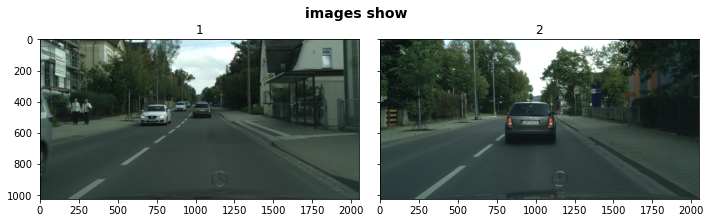

['jena_000000_000019_leftImg8bit.png', 'jena_000001_000019_leftImg8bit.png']


In [9]:
#semantic-segmentation-main\datasets\cityscapes.py
import os
import os.path as path
img_root = path.join(root, 'leftImg8bit_trainvaltest/leftImg8bit')
mask_root = path.join(root, 'gtFine_trainvaltest/gtFine')

import util
imgs_fn=util.filePath_extraction(img_root,["png"]) 
imgs_root=list(imgs_fn.keys())[0]
imgsFn_lst=imgs_fn[imgs_root]
imgsFn_lst.sort()
imgsFn_lst_=imgsFn_lst[:2]

columns=2
scale=1

util.imgs_layoutShow(imgs_root,imgsFn_lst_,columns,scale,figsize=(10,3))
print(imgsFn_lst_)

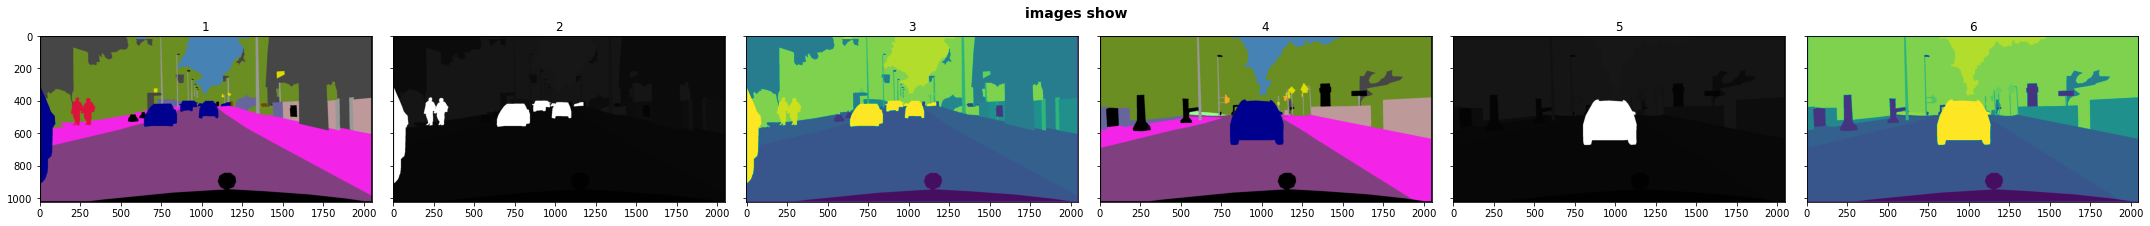

['jena_000000_000019_gtFine_color.png', 'jena_000000_000019_gtFine_instanceIds.png', 'jena_000000_000019_gtFine_labelIds.png', 'jena_000001_000019_gtFine_color.png', 'jena_000001_000019_gtFine_instanceIds.png', 'jena_000001_000019_gtFine_labelIds.png']


In [10]:
mask_fn=util.filePath_extraction(mask_root,["png"]) 
mask_root_=list(mask_fn.keys())[0]
maskFn_lst=mask_fn[mask_root_]
maskFn_lst.sort()
maskFn_lst_=maskFn_lst[:6]
columns=6
scale=1

util.imgs_layoutShow(mask_root_,maskFn_lst_,columns,scale,figsize=(30,3))
print(maskFn_lst_)

In [11]:
#semantic-segmentation-main\train.py
from runx.logx import logx
logx.initialize(logdir=args.result_dir,
                tensorboard=True, hparams=vars(args),
                global_rank=args.global_rank)

#semantic-segmentation-main\datasets\cityscapes.py
def cities_cv_split(root, split, cv_split):
    """
    Find cities that correspond to a given split of the data. We split the data
    such that a given city belongs to either train or val, but never both. cv0
    is defined to be the default split.

     all_cities = [x x x x x x x x x x x x]
     val:
       split0     [x x x                  ]
       split1     [        x x x          ]
       split2     [                x x x  ]
     trn:
       split0     [      x x x x x x x x x]
       split1     [x x x x       x x x x x]
       split2     [x x x x x x x x        ]

    split - train/val/test
    cv_split - 0,1,2,3

    cv_split == 3 means use train + val
    """
    trn_path = path.join(root, 'leftImg8bit_trainvaltest/leftImg8bit', 'train')
    val_path = path.join(root, 'leftImg8bit_trainvaltest/leftImg8bit', 'val')

    trn_cities = ['train/' + c for c in os.listdir(trn_path)]
    trn_cities = sorted(trn_cities)  # sort to insure reproducibility
    val_cities = ['val/' + c for c in os.listdir(val_path)]

    all_cities = val_cities + trn_cities

    if cv_split == 3:
        logx.msg('cv split {} {} {}'.format(split, cv_split, all_cities))
        return all_cities

    num_val_cities = len(val_cities)
    num_cities = len(all_cities)

    offset = cv_split * num_cities // cfg.DATASET.CV_SPLITS
    cities = []
    for j in range(num_cities):
        if j >= offset and j < (offset + num_val_cities):
            if split == 'val':
                cities.append(all_cities[j])
        else:
            if split == 'train':
                cities.append(all_cities[j])

    logx.msg('cv split {} {} {}'.format(split, cv_split, cities))
    return cities
mode='train'
fine_cities=cities_cv_split(root, mode, cfg.DATASET.CV)

cv split train 1 ['val/frankfurt', 'val/munster', 'val/lindau', 'train/aachen', 'train/bochum', 'train/bremen', 'train/cologne', 'train/hamburg', 'train/hanover', 'train/jena', 'train/krefeld', 'train/monchengladbach', 'train/strasbourg', 'train/stuttgart', 'train/tubingen', 'train/ulm', 'train/weimar', 'train/zurich']


In [12]:
#semantic-segmentation-main\datasets\cityscapes.py
def find_cityscapes_images(cities, img_root, mask_root, img_ext,mask_ext, fine_coarse='gtFine'):
    """
    Find image and segmentation mask files and return a list of
    tuples of them.

    Inputs:
    img_root: path to parent directory of train/val/test dirs
    mask_root: path to parent directory of train/val/test dirs
    img_ext: image file extension
    mask_ext: mask file extension
    cities: a list of cities, each element in the form of 'train/a_city'
      or 'val/a_city', for example.
    """
    items = []
    for city in cities:
        img_dir = '{root}/{city}'.format(root=img_root, city=city)
        for file_name in os.listdir(img_dir):
            basename, ext = os.path.splitext(file_name)
            assert ext == '.' + img_ext, '{} {}'.format(ext, img_ext)
            full_img_fn = os.path.join(img_dir, file_name)
            basename, ext = file_name.split('_leftImg8bit')
            if cfg.DATASET.CUSTOM_COARSE_PROB and fine_coarse != 'gtFine':
                mask_fn = f'{basename}_leftImg8bit.png'
                cc_path = cfg.DATASET.CITYSCAPES_CUSTOMCOARSE
                full_mask_fn = os.path.join(cc_path, city, mask_fn)
                os.path.isfile(full_mask_fn)
            else:
                mask_fn = f'{basename}_{fine_coarse}_labelIds{ext}'
                full_mask_fn = os.path.join(mask_root, city, mask_fn)
            items.append((full_img_fn, full_mask_fn))

    logx.msg('mode {} found {} images'.format(mode, len(items)))

    return items
img_ext = 'png'
mask_ext = 'png'
all_imgs=find_cityscapes_images(fine_cities,img_root,mask_root,img_ext, mask_ext)
print(all_imgs[:3])

mode train found 3060 images
[('D:\\Cityscapes_assets\\data/Cityscapes\\leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt\\frankfurt_000001_066574_leftImg8bit.png', 'D:\\Cityscapes_assets\\data/Cityscapes\\gtFine_trainvaltest/gtFine\\val/frankfurt\\frankfurt_000001_066574_gtFine_labelIds.png'), ('D:\\Cityscapes_assets\\data/Cityscapes\\leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt\\frankfurt_000001_067474_leftImg8bit.png', 'D:\\Cityscapes_assets\\data/Cityscapes\\gtFine_trainvaltest/gtFine\\val/frankfurt\\frankfurt_000001_067474_gtFine_labelIds.png'), ('D:\\Cityscapes_assets\\data/Cityscapes\\leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt\\frankfurt_000001_077092_leftImg8bit.png', 'D:\\Cityscapes_assets\\data/Cityscapes\\gtFine_trainvaltest/gtFine\\val/frankfurt\\frankfurt_000001_077092_gtFine_labelIds.png')]


In [13]:
#semantic-segmentation-main\datasets\uniform.py
from tqdm import tqdm
import sys
from collections import defaultdict
import numpy as np
from PIL import Image
from scipy.ndimage.measurements import center_of_mass
import json
import torch

def calc_tile_locations(tile_size, image_size):
    """
    Divide an image into tiles to help us cover classes that are spread out.
    tile_size: size of tile to distribute
    image_size: original image size
    return: locations of the tiles
    """
    image_size_y, image_size_x = image_size
    locations = []
    for y in range(image_size_y // tile_size):
        for x in range(image_size_x // tile_size):
            x_offs = x * tile_size
            y_offs = y * tile_size
            locations.append((x_offs, y_offs))
    return locations

def class_centroids_image(item, tile_size, num_classes, id2trainid):
    """
    For one image, calculate centroids for all classes present in image.
    item: image, image_name
    tile_size:
    num_classes:
    id2trainid: mapping from original id to training ids
    return: Centroids are calculated for each tile.
    """
    image_fn, label_fn = item
    centroids = defaultdict(list)
    mask = np.array(Image.open(label_fn))
    image_size = mask.shape
    tile_locations = calc_tile_locations(tile_size, image_size)

    drop_mask = np.zeros((1024,2048))
    drop_mask[15:840, 14:2030] = 1.0

    #####
    if(cfg.DATASET.CITYSCAPES_CUSTOMCOARSE in label_fn):
            gtCoarse_mask_path = label_fn.replace(cfg.DATASET.CITYSCAPES_CUSTOMCOARSE, os.path.join(cfg.DATASET.CITYSCAPES_DIR, 'gtCoarse/gtCoarse') )
            gtCoarse_mask_path = gtCoarse_mask_path.replace('leftImg8bit','gtCoarse_labelIds')          
            gtCoarse=np.array(Image.open(gtCoarse_mask_path))    
    ####

    mask_copy = mask.copy()
    if id2trainid:
        for k, v in id2trainid.items():
            binary_mask = (mask_copy == k)
            #This should only apply to auto labelled images
            if ('refinement' in label_fn) and cfg.DROPOUT_COARSE_BOOST_CLASSES != None and v in cfg.DROPOUT_COARSE_BOOST_CLASSES and binary_mask.sum() > 0:
                binary_mask += (gtCoarse == k)
                binary_mask[binary_mask >= 1] = 1
                mask[binary_mask] = gtCoarse[binary_mask]
            mask[binary_mask] = v

    for x_offs, y_offs in tile_locations:
        patch = mask[y_offs:y_offs + tile_size, x_offs:x_offs + tile_size]
        for class_id in range(num_classes):
            if class_id in patch:
                patch_class = (patch == class_id).astype(int)
                centroid_y, centroid_x = center_of_mass(patch_class)
                centroid_y = int(centroid_y) + y_offs
                centroid_x = int(centroid_x) + x_offs
                centroid = (centroid_x, centroid_y)
                centroids[class_id].append((image_fn, label_fn, centroid,
                                            class_id))
    pbar.update(1)
    return centroids

def pooled_class_centroids_all(items, num_classes, id2trainid, tile_size=1024):
    """
    Calculate class centroids for all classes for all images for all tiles.
    items: list of (image_fn, label_fn)
    tile size: size of tile
    returns: dict that contains a list of centroids for each class
    """
    from multiprocessing.dummy import Pool
    from functools import partial
    pool = Pool(40) #如果运行过程进度条不动，则需要调小该值
    global pbar
    pbar = tqdm(total=len(items), desc='pooled centroid extraction', file=sys.stdout)
    class_centroids_item = partial(class_centroids_image,
                                   num_classes=num_classes,
                                   id2trainid=id2trainid,
                                   tile_size=tile_size)

    centroids = defaultdict(list)
    new_centroids = pool.map(class_centroids_item, items)
    pool.close()
    pool.join()

    # combine each image's items into a single global dict
    for image_items in new_centroids:
        for class_id in image_items:
            centroids[class_id].extend(image_items[class_id])
    return centroids

def class_centroids_all(items, num_classes, id2trainid, tile_size=1024):
    """
    intermediate function to call pooled_class_centroid
    """
    pooled_centroids = pooled_class_centroids_all(items, num_classes,id2trainid, tile_size)
    # pooled_centroids = unpooled_class_centroids_all(items, num_classes,id2trainid, tile_size)
    return pooled_centroids

def build_centroids(imgs, num_classes, train, cv=None, coarse=False,custom_coarse=False, id2trainid=None):
    """
    The first step of uniform sampling is to decide sampling centers.
    The idea is to divide each image into tiles and within each tile,
    we compute a centroid for each class to indicate roughly where to
    sample a crop during training.

    This function computes these centroids and returns a list of them.
    """
    if not (cfg.DATASET.CLASS_UNIFORM_PCT and train):
        return []

    centroid_fn = cfg.DATASET.NAME
    
    if coarse or custom_coarse:
        if coarse:
            centroid_fn += '_coarse'
        if custom_coarse:
            centroid_fn += '_customcoarse_final'
    else:
        centroid_fn += '_cv{}'.format(cv)
    centroid_fn += '_tile{}.json'.format(cfg.DATASET.CLASS_UNIFORM_TILE)
    json_fn = os.path.join(cfg.DATASET.CENTROID_ROOT,
                           centroid_fn)
    if os.path.isfile(json_fn):
        logx.msg('Loading centroid file {}'.format(json_fn))
        with open(json_fn, 'r') as json_data:
            centroids = json.load(json_data)
        centroids = {int(idx): centroids[idx] for idx in centroids}
        logx.msg('Found {} centroids'.format(len(centroids)))
    else:
        logx.msg('Didn\'t find {}, so building it'.format(json_fn))

        if cfg.GLOBAL_RANK==0:

            os.makedirs(cfg.DATASET.CENTROID_ROOT, exist_ok=True)
            # centroids is a dict (indexed by class) of lists of centroids
            centroids = class_centroids_all(
                imgs,
                num_classes,
                id2trainid=id2trainid)
            with open(json_fn, 'w') as outfile:
                json.dump(centroids, outfile, indent=4)

        # wait for everyone to be at the same point
        #torch.distributed.barrier() #需要注释掉，不用对其它非主进程进行阻塞，来达到同步的目的

        #  GPUs (except rank0) read in the just-created centroid file
        if cfg.GLOBAL_RANK != 0:
            msg = f'Expected to find {json_fn}'
            assert os.path.isfile(json_fn), msg
            with open(json_fn, 'r') as json_data:
                centroids = json.load(json_data)
            centroids = {int(idx): centroids[idx] for idx in centroids}
        
    return centroids

num_classes=19
train=mode=='train' #位于semantic-segmentation-main\datasets\base_loader.py
id_to_trainid=label2trainid
fine_centroids=build_centroids(all_imgs, num_classes,train,cv=cfg.DATASET.CV,id2trainid=id_to_trainid)

Didn't find D:\Cityscapes_assets\uniform_centroids\_cv1_tile1024.json, so building it
pooled centroid extraction: 100%|██████████| 3060/3060 [05:22<00:00, 10.56it/s]

In [40]:
with open (os.path.join(cfg.DATASET.CENTROID_ROOT,'_cv1_tile1024.json'),'r') as f:
    centroids=json.load(f)
print("centroids example:",centroids['0'][0])

centroids example: ['D:\\Cityscapes_assets\\data/Cityscapes\\leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt\\frankfurt_000001_066574_leftImg8bit.png', 'D:\\Cityscapes_assets\\data/Cityscapes\\gtFine_trainvaltest/gtFine\\val/frankfurt\\frankfurt_000001_066574_gtFine_labelIds.png', [494, 742], 0]


In [147]:
#semantic-segmentation-main\datasets\uniform.py
def calc_tile_locations(tile_size, image_size):
    """
    Divide an image into tiles to help us cover classes that are spread out.
    tile_size: size of tile to distribute
    image_size: original image size
    return: locations of the tiles
    """
    image_size_y, image_size_x = image_size
    locations = []
    for y in range(image_size_y // tile_size):
        for x in range(image_size_x // tile_size):
            x_offs = x * tile_size
            y_offs = y * tile_size
            locations.append((x_offs, y_offs))
    return locations

def class_centroids_image(item, tile_size, num_classes, id2trainid):
    """
    For one image, calculate centroids for all classes present in image.
    item: image, image_name
    tile_size:
    num_classes:
    id2trainid: mapping from original id to training ids
    return: Centroids are calculated for each tile.
    """
    image_fn, label_fn = item
    centroids = defaultdict(list)
    mask = np.array(Image.open(label_fn))
    print("The image labels ID/图像类标:",np.unique(mask))
    image_size = mask.shape
    tile_locations = calc_tile_locations(tile_size, image_size)

    drop_mask = np.zeros((1024,2048))
    drop_mask[15:840, 14:2030] = 1.0

    #####
    if(cfg.DATASET.CITYSCAPES_CUSTOMCOARSE in label_fn):
            gtCoarse_mask_path = label_fn.replace(cfg.DATASET.CITYSCAPES_CUSTOMCOARSE, os.path.join(cfg.DATASET.CITYSCAPES_DIR, 'gtCoarse/gtCoarse') )
            gtCoarse_mask_path = gtCoarse_mask_path.replace('leftImg8bit','gtCoarse_labelIds')          
            gtCoarse=np.array(Image.open(gtCoarse_mask_path))    
    ####

    mask_copy = mask.copy()
    if id2trainid:
        for k, v in id2trainid.items():
            binary_mask = (mask_copy == k)
            #This should only apply to auto labelled images
            if ('refinement' in label_fn) and cfg.DROPOUT_COARSE_BOOST_CLASSES != None and v in cfg.DROPOUT_COARSE_BOOST_CLASSES and binary_mask.sum() > 0:
                binary_mask += (gtCoarse == k)
                binary_mask[binary_mask >= 1] = 1
                mask[binary_mask] = gtCoarse[binary_mask]
            mask[binary_mask] = v

    for x_offs, y_offs in tile_locations:
        patch = mask[y_offs:y_offs + tile_size, x_offs:x_offs + tile_size]
        for class_id in range(num_classes):
            if class_id in patch:
                patch_class = (patch == class_id).astype(int)
                centroid_y, centroid_x = center_of_mass(patch_class)
                centroid_y = int(centroid_y) + y_offs
                centroid_x = int(centroid_x) + x_offs
                centroid = (centroid_x, centroid_y)
                centroids[class_id].append((image_fn, label_fn, centroid,class_id))
    pbar.update(1)
    print("\n一幅图像，部分类的中心点坐标",centroids[0])
    return centroids

img_idx=35
num_classes=19
train=mode=='train' #位于semantic-segmentation-main\datasets\base_loader.py
id_to_trainid=label2trainid
centroids_single=class_centroids_image(all_imgs[img_idx], tile_size=1024,num_classes=num_classes,id2trainid=id_to_trainid)

The image labels ID/图像类标: [ 1  2  3  4  6  7  8 11 12 13 17 19 20 21 23 24 25 26 31 32 33]

pooled centroid extraction: 28it [3:23:21, 260.40s/it]
一幅图像，部分类的中心点坐标 [('D:\\Cityscapes_assets\\data/Cityscapes\\leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt\\frankfurt_000000_011810_leftImg8bit.png', 'D:\\Cityscapes_assets\\data/Cityscapes\\gtFine_trainvaltest/gtFine\\val/frankfurt\\frankfurt_000000_011810_gtFine_labelIds.png', (524, 749), 0), ('D:\\Cityscapes_assets\\data/Cityscapes\\leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt\\frankfurt_000000_011810_leftImg8bit.png', 'D:\\Cityscapes_assets\\data/Cityscapes\\gtFine_trainvaltest/gtFine\\val/frankfurt\\frankfurt_000000_011810_gtFine_labelIds.png', (1347, 725), 0)]


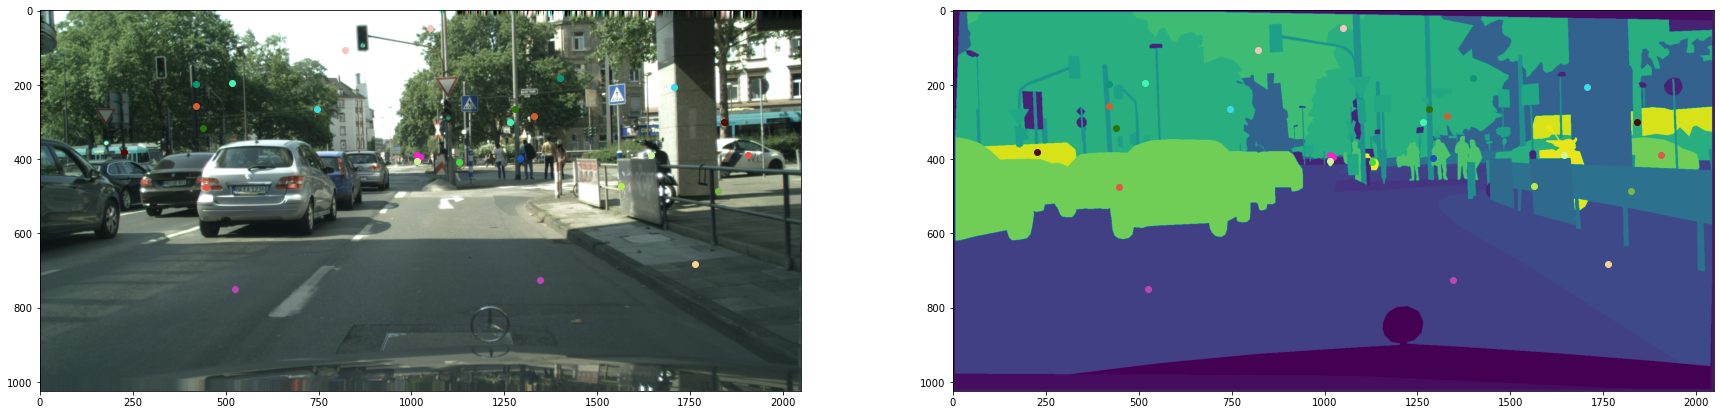

In [148]:
import matplotlib.pyplot as plt
from PIL import Image

fig=plt.figure(figsize=(30,20))
ax_1=fig.add_subplot(121)
ax_2=fig.add_subplot(122)


img=Image.open(all_imgs[img_idx][0])
ax_1.imshow(img)

label=Image.open(all_imgs[img_idx][1])
ax_2.imshow(label)

colors=np.random.rand(20)
centroids_=[[centroids[2] for centroids in val] for val in centroids_single.values()]
for c in centroids_:
    color=np.random.rand(3,)
    for i in c:
        ax_1.scatter(i[0],i[1],c=color.reshape(1,-1))
        ax_2.scatter(i[0],i[1],c=color.reshape(1,-1))
    
plt.show()

In [182]:
#semantic-segmentation-main\datasets\uniform.py
def random_sampling(alist, num):
    """
    Randomly sample num items from the list
    alist: list of centroids to sample from
    num: can be larger than the list and if so, then wrap around
    return: class uniform samples from the list
    """
    sampling = []
    len_list = len(alist)
    assert len_list, 'len_list is zero!'
    indices = np.arange(len_list)
    np.random.shuffle(indices)

    for i in range(num):
        item = alist[indices[i % len_list]]
        sampling.append(item)
    return sampling

def build_epoch(imgs, centroids, num_classes, train):
    """
    Generate an epoch of crops using uniform sampling.
    Needs to be called every epoch.
    Will not apply uniform sampling if not train or class uniform is off.

    Inputs:
      imgs - list of imgs
      centroids - list of class centroids
      num_classes - number of classes
      class_uniform_pct: % of uniform images in one epoch
    Outputs:
      imgs - list of images to use this epoch
    """
    class_uniform_pct = cfg.DATASET.CLASS_UNIFORM_PCT
    if not (train and class_uniform_pct):
        return imgs

    logx.msg("Class Uniform Percentage: {}".format(str(class_uniform_pct)))
    num_epoch = int(len(imgs))

    logx.msg('Class Uniform items per Epoch: {}'.format(str(num_epoch)))
    num_per_class = int((num_epoch * class_uniform_pct) / num_classes)
    class_uniform_count = num_per_class * num_classes
    num_rand = num_epoch - class_uniform_count
    # create random crops
    imgs_uniform = random_sampling(imgs, num_rand)

    # now add uniform sampling
    for class_id in range(num_classes):
        msg = "cls {} len {}".format(class_id, len(centroids[class_id]))
        logx.msg(msg)
    for class_id in range(num_classes):
        if cfg.DATASET.CLASS_UNIFORM_BIAS is not None:
            bias = cfg.DATASET.CLASS_UNIFORM_BIAS[class_id]
            num_per_class_biased = int(num_per_class * bias)
        else:
            num_per_class_biased = num_per_class
        centroid_len = len(centroids[class_id])
        if centroid_len == 0:
            pass
        else:
            class_centroids = random_sampling(centroids[class_id],num_per_class_biased)
            imgs_uniform.extend(class_centroids)

    return imgs_uniform

imgs_uniform=build_epoch(all_imgs,fine_centroids,num_classes,mode == 'train')

Class Uniform Percentage: 0.5
Class Uniform items per Epoch: 3060
cls 0 len 10
cls 1 len 10
cls 2 len 10
cls 3 len 3
cls 4 len 4
cls 5 len 10
cls 6 len 7
cls 7 len 9
cls 8 len 9
cls 9 len 1
cls 10 len 7
cls 11 len 8
cls 12 len 3
cls 13 len 9
cls 14 len 1
cls 15 len 2
cls 16 len 3
cls 17 len 2
cls 18 len 4


In [266]:
cfg.DATASET.CLASS_UNIFORM_PCT

0.5

In [193]:
#semantic-segmentation-main\config.py
num_classes, ignore_label=19,255
def update_dataset_cfg(num_classes, ignore_label):
    cfg.immutable(False)
    cfg.DATASET.NUM_CLASSES = num_classes
    cfg.DATASET.IGNORE_LABEL = ignore_label
    logx.msg('num_classes = {}'.format(num_classes))
    cfg.immutable(True)
update_dataset_cfg(num_classes, ignore_label)

num_classes = 19


In [482]:
#semantic-segmentation-main\datasets\__init__.py
args.crop_size = int(args.crop_size)

#semantic-segmentation-main\transforms\joint_transforms.py
import numbers

def set_crop_size(crop_size):
    if isinstance(crop_size, (list, tuple)):
        size = crop_size
    elif isinstance(crop_size, numbers.Number):
        size = (int(crop_size), int(crop_size))
    else:
        raise
    return size

class RandomCrop(object):
    """
    Take a random crop from the image.

    First the image or crop size may need to be adjusted if the incoming image
    is too small...

    If the image is smaller than the crop, then:
         the image is padded up to the size of the crop
         unless 'nopad', in which case the crop size is shrunk to fit the image

    A random crop is taken such that the crop fits within the image.


    if cfg.DATASET.TRANSLATION_AUG_FIX is set, we insure that there's always
    translation randomness of at least that value around the image.

    if image < crop_size:
        # slide crop within image, random offset
    else:
        # slide image within crop
    """
    def __init__(self, crop_size, nopad=True):
        self.size = set_crop_size(crop_size)
        self.ignore_index = cfg.DATASET.IGNORE_LABEL
        self.nopad = nopad
        self.pad_color = (0, 0, 0)

    @staticmethod
    def crop_in_image(centroid, target_w, target_h, w, h, img, mask):
        if centroid is not None:
            # Need to insure that centroid is covered by crop and that crop
            # sits fully within the image
            c_x, c_y = centroid
            max_x = w - target_w
            max_y = h - target_h
            x1 = random.randint(c_x - target_w, c_x)
            x1 = min(max_x, max(0, x1))
            y1 = random.randint(c_y - target_h, c_y)
            y1 = min(max_y, max(0, y1))
        else:
            if w == target_w:
                x1 = 0
            else:
                x1 = random.randint(0, w - target_w)
            if h == target_h:
                y1 = 0
            else:
                y1 = random.randint(0, h - target_h)

        return [img.crop((x1, y1, x1 + target_w, y1 + target_h)),
                mask.crop((x1, y1, x1 + target_w, y1 + target_h))]

    def image_in_crop(self, target_w, target_h, w, h, img, mask):
        # image smaller than crop, so slide image within crop
        x_total_margin = target_w - w
        y_total_margin = target_h - h

        left = random.randint(0, x_total_margin)
        right = x_total_margin - left

        top = random.randint(0, y_total_margin)
        bottom = y_total_margin - top

        slid_image = add_margin(img, top, right, bottom, left,
                                self.pad_color)
        slid_mask = add_margin(mask, top, right, bottom, left,
                               self.ignore_index)
        return [slid_image, slid_mask]

    def __call__(self, img, mask, centroid=None):
        assert img.size == mask.size
        w, h = img.size
        target_h, target_w = self.size  # ASSUME H, W

        if w == target_w and h == target_h:
            return [img, mask]

        if cfg.DATASET.TRANSLATE_AUG_FIX:
            if w < target_w and h < target_h:
                return self.image_in_crop(target_w, target_h, w, h, img, mask)
            else:
                return self.crop_in_image(centroid, target_w, target_h, w, h,
                                          img, mask)

        if self.nopad:
            # Shrink crop size if image < crop
            if target_h > h or target_w > w:
                shorter_side = min(w, h)
                target_h, target_w = shorter_side, shorter_side
        else:
            # Pad image if image < crop
            if target_h > h:
                pad_h = (target_h - h) // 2 + 1
            else:
                pad_h = 0
            if target_w > w:
                pad_w = (target_w - w) // 2 + 1
            else:
                pad_w = 0
            border = (pad_w, pad_h, pad_w, pad_h)
            if pad_h or pad_w:
                img = ImageOps.expand(img, border=border, fill=self.pad_color)
                mask = ImageOps.expand(mask, border=border,
                                       fill=self.ignore_index)
                w, h = img.size

        return self.crop_in_image(centroid, target_w, target_h, w, h,img, mask)
    
class RandomSizeAndCrop(object):
    def __init__(self, crop_size, crop_nopad,scale_min=0.5, scale_max=2.0, full_size=False, pre_size=None):
        self.crop = RandomCrop(crop_size, nopad=crop_nopad)
        self.scale_min = scale_min
        self.scale_max = scale_max
        self.full_size = full_size
        self.pre_size = pre_size

    def __call__(self, img, mask, centroid=None):
        assert img.size == mask.size

        scale_amt = random.uniform(self.scale_min, self.scale_max)

        if self.pre_size is not None:
            in_w, in_h = img.size
            # find long edge
            if in_w > in_h:
                # long is width
                pre_scale = self.pre_size / in_w
            else:
                pre_scale = self.pre_size / in_h
            scale_amt *= pre_scale

        if self.full_size:
            self.crop.size = img.size[1], img.size[0]

        w, h = [int(i * scale_amt) for i in img.size]

        if centroid is not None:
            centroid = [int(c * scale_amt) for c in centroid]

        resized_img, resized_mask = (img.resize((w, h), Image.BICUBIC),
                                     mask.resize((w, h), Image.NEAREST))

        img_mask = self.crop(resized_img, resized_mask, centroid)
        img_mask.append(scale_amt)
        return img_mask

#semantic-segmentation-main\datasets\__init__.py
train_joint_transform_list = [RandomSizeAndCrop(args.crop_size,False,scale_min=args.scale_min,scale_max=args.scale_max,full_size=args.full_crop_training,pre_size=args.pre_size) ]

#semantic-segmentation-main\transforms\joint_transforms.py
class RandomHorizontallyFlip(object):
    def __call__(self, img, mask):
        if random.random() < 0.5:
            return img.transpose(Image.FLIP_LEFT_RIGHT), mask.transpose(
                Image.FLIP_LEFT_RIGHT)
        return img, mask
    
train_joint_transform_list.append(RandomHorizontallyFlip())    

In [483]:
#semantic-segmentation-main\transforms\transforms.py
class ColorJitter(object):
    """Randomly change the brightness, contrast and saturation of an image.

    Args:
        brightness (float): How much to jitter brightness. brightness_factor
            is chosen uniformly from [max(0, 1 - brightness), 1 + brightness].
        contrast (float): How much to jitter contrast. contrast_factor
            is chosen uniformly from [max(0, 1 - contrast), 1 + contrast].
        saturation (float): How much to jitter saturation. saturation_factor
            is chosen uniformly from [max(0, 1 - saturation), 1 + saturation].
        hue(float): How much to jitter hue. hue_factor is chosen uniformly from
            [-hue, hue]. Should be >=0 and <= 0.5.
    """
    def __init__(self, brightness=0, contrast=0, saturation=0, hue=0):
        self.brightness = brightness
        self.contrast = contrast
        self.saturation = saturation
        self.hue = hue

    @staticmethod
    def get_params(brightness, contrast, saturation, hue):
        """Get a randomized transform to be applied on image.

        Arguments are same as that of __init__.

        Returns:
            Transform which randomly adjusts brightness, contrast and
            saturation in a random order.
        """
        transforms = []
        if brightness > 0:
            brightness_factor = np.random.uniform(max(0, 1 - brightness), 1 + brightness)
            transforms.append(
                torch_tr.Lambda(lambda img: adjust_brightness(img, brightness_factor)))

        if contrast > 0:
            contrast_factor = np.random.uniform(max(0, 1 - contrast), 1 + contrast)
            transforms.append(
                torch_tr.Lambda(lambda img: adjust_contrast(img, contrast_factor)))

        if saturation > 0:
            saturation_factor = np.random.uniform(max(0, 1 - saturation), 1 + saturation)
            transforms.append(
                torch_tr.Lambda(lambda img: adjust_saturation(img, saturation_factor)))

        if hue > 0:
            hue_factor = np.random.uniform(-hue, hue)
            transforms.append(
                torch_tr.Lambda(lambda img: adjust_hue(img, hue_factor)))

        np.random.shuffle(transforms)
        transform = torch_tr.Compose(transforms)

        return transform

    def __call__(self, img):
        """
        Args:
            img (PIL Image): Input image.

        Returns:
            PIL Image: Color jittered image.
        """
        transform = self.get_params(self.brightness, self.contrast,
                                    self.saturation, self.hue)
        return transform(img)



#semantic-segmentation-main\datasets\__init__.py
######################################################################
# Image only augmentations
######################################################################
train_input_transform = []
if args.color_aug:
    train_input_transform += [ColorJitter( brightness=args.color_aug, contrast=args.color_aug,saturation=args.color_aug,hue=args.color_aug)]    
import torchvision.transforms as standard_transforms
mean_std = (cfg.DATASET.MEAN, cfg.DATASET.STD)
train_input_transform += [standard_transforms.ToTensor(),standard_transforms.Normalize(*mean_std)]
train_input_transform = standard_transforms.Compose(train_input_transform)

In [484]:
#semantic-segmentation-main\transforms\transforms.py
def adjust_saturation(img, saturation_factor):
    """Adjust color saturation of an image.

    Args:
        img (PIL Image): PIL Image to be adjusted.
        saturation_factor (float):  How much to adjust the saturation. 0 will
            give a black and white image, 1 will give the original image while
            2 will enhance the saturation by a factor of 2.

    Returns:
        PIL Image: Saturation adjusted image.
    """
    if not _is_pil_image(img):
        raise TypeError('img should be PIL Image. Got {}'.format(type(img)))

    enhancer = ImageEnhance.Color(img)
    img = enhancer.enhance(saturation_factor)
    return img

def adjust_brightness(img, brightness_factor):
    """Adjust brightness of an Image.

    Args:
        img (PIL Image): PIL Image to be adjusted.
        brightness_factor (float):  How much to adjust the brightness. Can be
            any non negative number. 0 gives a black image, 1 gives the
            original image while 2 increases the brightness by a factor of 2.

    Returns:
        PIL Image: Brightness adjusted image.
    """
    if not _is_pil_image(img):
        raise TypeError('img should be PIL Image. Got {}'.format(type(img)))

    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(brightness_factor)
    return img

def adjust_contrast(img, contrast_factor):
    """Adjust contrast of an Image.

    Args:
        img (PIL Image): PIL Image to be adjusted.
        contrast_factor (float): How much to adjust the contrast. Can be any
            non negative number. 0 gives a solid gray image, 1 gives the
            original image while 2 increases the contrast by a factor of 2.

    Returns:
        PIL Image: Contrast adjusted image.
    """
    if not _is_pil_image(img):
        raise TypeError('img should be PIL Image. Got {}'.format(type(img)))

    enhancer = ImageEnhance.Contrast(img)
    img = enhancer.enhance(contrast_factor)
    return img

def _is_pil_image(img):
    if accimage is not None:
        return isinstance(img, (Image.Image, accimage.Image))
    else:
        return isinstance(img, Image.Image)
    
def adjust_hue(img, hue_factor):
    """Adjust hue of an image.

    The image hue is adjusted by converting the image to HSV and
    cyclically shifting the intensities in the hue channel (H).
    The image is then converted back to original image mode.

    `hue_factor` is the amount of shift in H channel and must be in the
    interval `[-0.5, 0.5]`.

    See https://en.wikipedia.org/wiki/Hue for more details on Hue.

    Args:
        img (PIL Image): PIL Image to be adjusted.
        hue_factor (float):  How much to shift the hue channel. Should be in
            [-0.5, 0.5]. 0.5 and -0.5 give complete reversal of hue channel in
            HSV space in positive and negative direction respectively.
            0 means no shift. Therefore, both -0.5 and 0.5 will give an image
            with complementary colors while 0 gives the original image.

    Returns:
        PIL Image: Hue adjusted image.
    """
    if not(-0.5 <= hue_factor <= 0.5):
        raise ValueError('hue_factor is not in [-0.5, 0.5].'.format(hue_factor))

    if not _is_pil_image(img):
        raise TypeError('img should be PIL Image. Got {}'.format(type(img)))

    input_mode = img.mode
    if input_mode in {'L', '1', 'I', 'F'}:
        return img

    h, s, v = img.convert('HSV').split()

    np_h = np.array(h, dtype=np.uint8)
    # uint8 addition take cares of rotation across boundaries
    with np.errstate(over='ignore'):
        np_h += np.uint8(hue_factor * 255)
    h = Image.fromarray(np_h, 'L')

    img = Image.merge('HSV', (h, s, v)).convert(input_mode)
    return img

class MaskToTensor(object):
    def __call__(self, img, blockout_predefined_area=False):
        return torch.from_numpy(np.array(img, dtype=np.int32)).long()
    
class RelaxedBoundaryLossToTensor(object):
    """
    Boundary Relaxation
    """
    def __init__(self,ignore_id, num_classes):
        self.ignore_id=ignore_id
        self.num_classes= num_classes


    def new_one_hot_converter(self,a):
        ncols = self.num_classes+1
        out = np.zeros( (a.size,ncols), dtype=np.uint8)
        out[np.arange(a.size),a.ravel()] = 1
        out.shape = a.shape + (ncols,)
        return out

    def __call__(self,img):

        img_arr = np.array(img)
        img_arr[img_arr==self.ignore_id]=self.num_classes
        
        if cfg.STRICTBORDERCLASS != None:
            one_hot_orig = self.new_one_hot_converter(img_arr)
            mask = np.zeros((img_arr.shape[0],img_arr.shape[1]))
            for cls in cfg.STRICTBORDERCLASS:
                mask = np.logical_or(mask,(img_arr == cls))
        one_hot = 0

        border = cfg.BORDER_WINDOW
        if (cfg.REDUCE_BORDER_EPOCH !=-1 and cfg.EPOCH > cfg.REDUCE_BORDER_EPOCH):
            border = border // 2
            border_prediction = find_boundaries(img_arr, mode='thick').astype(np.uint8)
        
        for i in range(-border,border+1):
            for j in range(-border, border+1):
                shifted= shift(img_arr,(i,j), cval=self.num_classes)
                one_hot += self.new_one_hot_converter(shifted)       
        
        one_hot[one_hot>1] = 1
        
        if cfg.STRICTBORDERCLASS != None:
            one_hot = np.where(np.expand_dims(mask,2), one_hot_orig, one_hot)
    
        one_hot = np.moveaxis(one_hot,-1,0)
    

        if (cfg.REDUCE_BORDER_EPOCH !=-1 and cfg.EPOCH > cfg.REDUCE_BORDER_EPOCH):
                one_hot = np.where(border_prediction,2*one_hot,1*one_hot)
                # print(one_hot.shape)
        return torch.from_numpy(one_hot).byte()

#semantic-segmentation-main\datasets\__init__.py
if args.jointwtborder:
    target_train_transform =RelaxedBoundaryLossToTensor()
else:
    target_train_transform =MaskToTensor()

In [485]:
#位于semantic-segmentation-main\datasets\base_loader.py
def dump_images(img_name, mask, centroid, class_id, img):
    img = tensor_to_pil(img)
    outdir = 'new_dump_imgs_{}'.format(self.mode)
    os.makedirs(outdir, exist_ok=True)
    if centroid is not None:
        dump_img_name = '{}_{}'.format(self.trainid_to_name[class_id],
                                       img_name)
    else:
        dump_img_name = img_name
    out_img_fn = os.path.join(outdir, dump_img_name + '.png')
    out_msk_fn = os.path.join(outdir, dump_img_name + '_mask.png')
    out_raw_fn = os.path.join(outdir, dump_img_name + '_mask_raw.png')
    mask_img = self.colorize_mask(np.array(mask))
    raw_img = Image.fromarray(np.array(mask))
    img.save(out_img_fn)
    mask_img.save(out_msk_fn)
    raw_img.save(out_raw_fn)

def read_images(img_path, mask_path, mask_out=False):
    img = Image.open(img_path).convert('RGB')
    if mask_path is None or mask_path == '':
        w, h = img.size
        mask = np.zeros((h, w))
    else:
        mask = Image.open(mask_path)

    drop_out_mask = None
    # This code is specific to cityscapes
    if(cfg.DATASET.CITYSCAPES_CUSTOMCOARSE in mask_path):

        gtCoarse_mask_path = mask_path.replace(cfg.DATASET.CITYSCAPES_CUSTOMCOARSE, os.path.join(cfg.DATASET.CITYSCAPES_DIR, 'gtCoarse/gtCoarse') )
        gtCoarse_mask_path = gtCoarse_mask_path.replace('leftImg8bit','gtCoarse_labelIds')          
        gtCoarse=np.array(Image.open(gtCoarse_mask_path))



    img_name = os.path.splitext(os.path.basename(img_path))[0]

    mask = np.array(mask)
    if (mask_out):
        mask = self.drop_mask * mask

    mask = mask.copy()
    for k, v in id_to_trainid.items():
        binary_mask = (mask == k) #+ (gtCoarse == k)
        if ('refinement' in mask_path) and cfg.DROPOUT_COARSE_BOOST_CLASSES != None and v in cfg.DROPOUT_COARSE_BOOST_CLASSES and binary_mask.sum() > 0 and 'vidseq' not in mask_path:
            binary_mask += (gtCoarse == k)
            binary_mask[binary_mask >= 1] = 1
            mask[binary_mask] = gtCoarse[binary_mask]
        mask[binary_mask] = v


    mask = Image.fromarray(mask.astype(np.uint8))
    return img, mask, img_name

def do_transforms(img, mask, centroid, img_name, class_id):
    """
    Do transformations to image and mask

    :returns: image, mask
    """
    scale_float = 1.0

    if joint_transform_list is not None:
        for idx, xform in enumerate(joint_transform_list):
            if idx == 0 and centroid is not None:
                # HACK! Assume the first transform accepts a centroid
                outputs = xform(img, mask, centroid)
            else:
                outputs = xform(img, mask)

            if len(outputs) == 3:
                img, mask, scale_float = outputs
            else:
                img, mask = outputs

    if img_transform is not None:
        img = img_transform(img)

    if cfg.DATASET.DUMP_IMAGES:
        dump_images(img_name, mask, centroid, class_id, img)

    if label_transform is not None:
        mask = label_transform(mask)

    return img, mask, scale_float

index=0 #仅实验了一组图像（image and label/mask）
#if len(imgs_uniform[index]) == 2:
    #img_path, mask_path = imgs_uniform[index]
    #centroid = None
    #class_id = None
    
img_path, mask_path, centroid, class_id = fine_centroids[0][index]

img, mask, img_name = read_images(img_path, mask_path,mask_out=False)

joint_transform_list=train_joint_transform_list
img_transform=train_input_transform
label_transform=target_train_transform
accimage = None
import random
import torchvision.transforms as torch_tr
from PIL import Image, ImageOps
from PIL import Image, ImageEnhance
img, mask, scale_float = do_transforms(img, mask, centroid,img_name, class_id)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


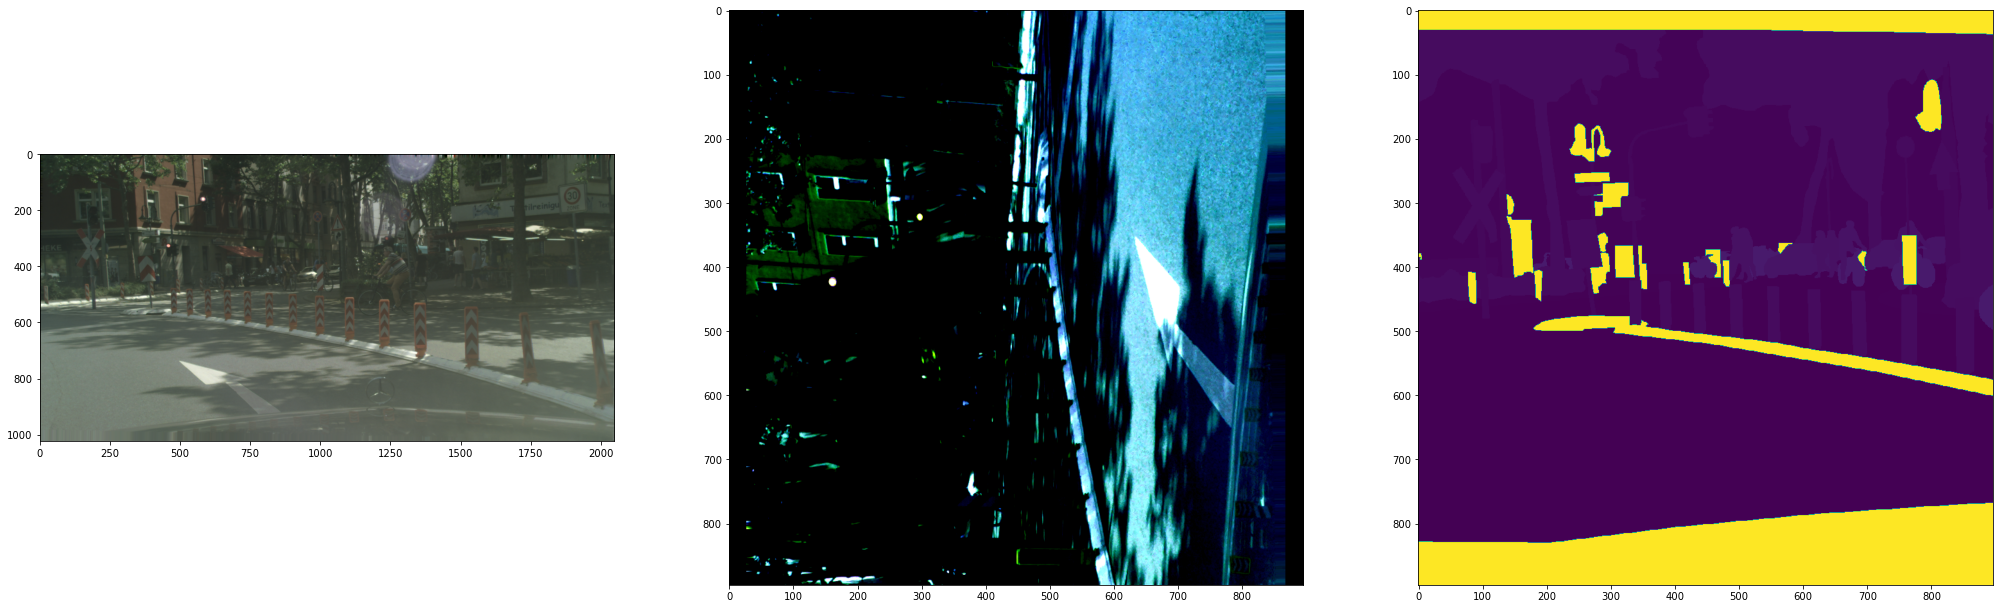

In [351]:
import matplotlib.pyplot as plt
from PIL import Image

fig=plt.figure(figsize=(35,15))
ax_1=fig.add_subplot(131)
ax_2=fig.add_subplot(132)
ax_3=fig.add_subplot(133)

ax_1.imshow(Image.open(fine_centroids[0][index][0]))
ax_2.imshow(np.transpose(img.numpy()))
ax_3.imshow(mask)

plt.show()

torch.utils.data.Dataset

In [559]:
#semantic-segmentation-main\datasets\base_loader.py
from torch.utils import data
class BaseLoader(data.Dataset):
    def __init__(self,imgs ):
        self.imgs=imgs
        self.drop_mask = np.zeros((1024, 2048))
        self.drop_mask[15:840, 14:2030] = 1.0
        
    
    def __len__(self):
        return len(self.imgs)
    
    def read_images(self,img_path, mask_path, mask_out=False):
        img = Image.open(img_path).convert('RGB')
        if mask_path is None or mask_path == '':
            w, h = img.size
            mask = np.zeros((h, w))
        else:
            mask = Image.open(mask_path)

        drop_out_mask = None
        # This code is specific to cityscapes
        if(cfg.DATASET.CITYSCAPES_CUSTOMCOARSE in mask_path):

            gtCoarse_mask_path = mask_path.replace(cfg.DATASET.CITYSCAPES_CUSTOMCOARSE, os.path.join(cfg.DATASET.CITYSCAPES_DIR, 'gtCoarse/gtCoarse') )
            gtCoarse_mask_path = gtCoarse_mask_path.replace('leftImg8bit','gtCoarse_labelIds')          
            gtCoarse=np.array(Image.open(gtCoarse_mask_path))

        img_name = os.path.splitext(os.path.basename(img_path))[0]

        mask = np.array(mask)
        if (mask_out):
            mask = self.drop_mask * mask

        mask = mask.copy()
        for k, v in id_to_trainid.items():
            binary_mask = (mask == k) #+ (gtCoarse == k)
            if ('refinement' in mask_path) and cfg.DROPOUT_COARSE_BOOST_CLASSES != None and v in cfg.DROPOUT_COARSE_BOOST_CLASSES and binary_mask.sum() > 0 and 'vidseq' not in mask_path:
                binary_mask += (gtCoarse == k)
                binary_mask[binary_mask >= 1] = 1
                mask[binary_mask] = gtCoarse[binary_mask]
            mask[binary_mask] = v


        mask = Image.fromarray(mask.astype(np.uint8))
        return img, mask, img_name
    
    
    def do_transforms(self,img, mask, centroid, img_name, class_id):
        """
        Do transformations to image and mask

        :returns: image, mask
        """
        scale_float = 1.0

        if joint_transform_list is not None:
            for idx, xform in enumerate(joint_transform_list):
                if idx == 0 and centroid is not None:
                    # HACK! Assume the first transform accepts a centroid
                    outputs = xform(img, mask, centroid)
                else:
                    outputs = xform(img, mask)

                if len(outputs) == 3:
                    img, mask, scale_float = outputs
                else:
                    img, mask = outputs

        if img_transform is not None:
            img = img_transform(img)

        if cfg.DATASET.DUMP_IMAGES:
            dump_images(img_name, mask, centroid, class_id, img)

        if label_transform is not None:
            mask = label_transform(mask)

        return img, mask, scale_float
                 
                 
    def __getitem__(self, index):
        if len(self.imgs[index]) == 2:
            img_path, mask_path = self.imgs[index]
            centroid = None
            class_id = None
            
        img, mask, img_name = self.read_images(img_path, mask_path,mask_out=True)    
        img, mask, scale_float = self.do_transforms(img, mask, centroid,img_name, class_id)
        return img, mask, img_name, scale_float

train_loader=BaseLoader(imgs=imgs_uniform)

#### 1.1.3  神经网络结构

In [555]:
#semantic-segmentation-main\network\mynn.py

def initialize_weights(*models):
    """
    Initialize Model Weights
    """
    for model in models:
        for module in model.modules():
            if isinstance(module, (nn.Conv2d, nn.Linear)):
                nn.init.kaiming_normal_(module.weight)
                if module.bias is not None:
                    module.bias.data.zero_()
            elif isinstance(module, cfg.MODEL.BNFUNC):
                module.weight.data.fill_(1)
                module.bias.data.zero_()
                
def Norm2d(in_channels, **kwargs):
    """
    Custom Norm Function to allow flexible switching
    """
    layer = getattr(cfg.MODEL, 'BNFUNC')
    normalization_layer = layer(in_channels, **kwargs)
    return normalization_layer



#semantic-segmentation-main\network\wide_restnet.py
from functools import partial
import logging

class GlobalAvgPool2d(nn.Module):
    """
    Global average pooling over the input's spatial dimensions
    """

    def __init__(self):
        super(GlobalAvgPool2d, self).__init__()
        logging.info("Global Average Pooling Initialized")

    def forward(self, inputs):
        in_size = inputs.size()
        return inputs.view((in_size[0], in_size[1], -1)).mean(dim=2)

class IdentityResidualBlock(nn.Module):
    """
    Identity Residual Block for WideResnet
    """
    def __init__(self,
                 in_channels,
                 channels,
                 stride=1,
                 dilation=1,
                 groups=1,
                 norm_act=bnrelu,
                 dropout=None,
                 dist_bn=False
                 ):
        """Configurable identity-mapping residual block

        Parameters
        ----------
        in_channels : int
            Number of input channels.
        channels : list of int
            Number of channels in the internal feature maps.
            Can either have two or three elements: if three construct
            a residual block with two `3 x 3` convolutions,
            otherwise construct a bottleneck block with `1 x 1`, then
            `3 x 3` then `1 x 1` convolutions.
        stride : int
            Stride of the first `3 x 3` convolution
        dilation : int
            Dilation to apply to the `3 x 3` convolutions.
        groups : int
            Number of convolution groups.
            This is used to create ResNeXt-style blocks and is only compatible with
            bottleneck blocks.
        norm_act : callable
            Function to create normalization / activation Module.
        dropout: callable
            Function to create Dropout Module.
        dist_bn: Boolean
            A variable to enable or disable use of distributed BN
        """
        super(IdentityResidualBlock, self).__init__()
        self.dist_bn = dist_bn

        # Check if we are using distributed BN and use the nn from encoding.nn
        # library rather than using standard pytorch.nn


        # Check parameters for inconsistencies
        if len(channels) != 2 and len(channels) != 3:
            raise ValueError("channels must contain either two or three values")
        if len(channels) == 2 and groups != 1:
            raise ValueError("groups > 1 are only valid if len(channels) == 3")

        is_bottleneck = len(channels) == 3
        need_proj_conv = stride != 1 or in_channels != channels[-1]

        self.bn1 = norm_act(in_channels)
        if not is_bottleneck:
            layers = [
                ("conv1", nn.Conv2d(in_channels,
                                    channels[0],
                                    3,
                                    stride=stride,
                                    padding=dilation,
                                    bias=False,
                                    dilation=dilation)),
                ("bn2", norm_act(channels[0])),
                ("conv2", nn.Conv2d(channels[0], channels[1],
                                    3,
                                    stride=1,
                                    padding=dilation,
                                    bias=False,
                                    dilation=dilation))
            ]
            if dropout is not None:
                layers = layers[0:2] + [("dropout", dropout())] + layers[2:]
        else:
            layers = [
                ("conv1",
                 nn.Conv2d(in_channels,
                           channels[0],
                           1,
                           stride=stride,
                           padding=0,
                           bias=False)),
                ("bn2", norm_act(channels[0])),
                ("conv2", nn.Conv2d(channels[0],
                                    channels[1],
                                    3, stride=1,
                                    padding=dilation, bias=False,
                                    groups=groups,
                                    dilation=dilation)),
                ("bn3", norm_act(channels[1])),
                ("conv3", nn.Conv2d(channels[1], channels[2],
                                    1, stride=1, padding=0, bias=False))
            ]
            if dropout is not None:
                layers = layers[0:4] + [("dropout", dropout())] + layers[4:]
        self.convs = nn.Sequential(OrderedDict(layers))

        if need_proj_conv:
            self.proj_conv = nn.Conv2d(
                in_channels, channels[-1], 1, stride=stride, padding=0, bias=False)

    def forward(self, x):
        """
        This is the standard forward function for non-distributed batch norm
        """
        if hasattr(self, "proj_conv"):
            bn1 = self.bn1(x)
            shortcut = self.proj_conv(bn1)
        else:
            shortcut = x.clone()
            bn1 = self.bn1(x)

        out = self.convs(bn1)
        out.add_(shortcut)
        return out



def bnrelu(channels):
    """
    Single Layer BN and Relui
    """
    return nn.Sequential(Norm2d(channels),nn.ReLU(inplace=True))

class WiderResNet(nn.Module):
    """
    WideResnet Global Module for Initialization
    """
    def __init__(self,
                 structure,
                 norm_act=bnrelu,
                 classes=0
                 ):
        """Wider ResNet with pre-activation (identity mapping) blocks

        Parameters
        ----------
        structure : list of int
            Number of residual blocks in each of the six modules of the network.
        norm_act : callable
            Function to create normalization / activation Module.
        classes : int
            If not `0` also include global average pooling and \
            a fully-connected layer with `classes` outputs at the end
            of the network.
        """
        super(WiderResNet, self).__init__()
        self.structure = structure

        if len(structure) != 6:
            raise ValueError("Expected a structure with six values")

        # Initial layers
        self.mod1 = nn.Sequential(OrderedDict([
            ("conv1", nn.Conv2d(3, 64, 3, stride=1, padding=1, bias=False))
        ]))

        # Groups of residual blocks
        in_channels = 64
        channels = [(128, 128), (256, 256), (512, 512), (512, 1024),
                    (512, 1024, 2048), (1024, 2048, 4096)]
        for mod_id, num in enumerate(structure):
            # Create blocks for module
            blocks = []
            for block_id in range(num):
                blocks.append((
                    "block%d" % (block_id + 1),
                    IdentityResidualBlock(in_channels, channels[mod_id],
                                          norm_act=norm_act)
                ))

                # Update channels and p_keep
                in_channels = channels[mod_id][-1]

            # Create module
            if mod_id <= 4:
                self.add_module("pool%d" %
                                (mod_id + 2), nn.MaxPool2d(3, stride=2, padding=1))
            self.add_module("mod%d" % (mod_id + 2), nn.Sequential(OrderedDict(blocks)))

        # Pooling and predictor
        self.bn_out = norm_act(in_channels)
        if classes != 0:
            self.classifier = nn.Sequential(OrderedDict([
                ("avg_pool", GlobalAvgPool2d()),
                ("fc", nn.Linear(in_channels, classes))
            ]))

    def forward(self, img):
        out = self.mod1(img)
        out = self.mod2(self.pool2(out))
        out = self.mod3(self.pool3(out))
        out = self.mod4(self.pool4(out))
        out = self.mod5(self.pool5(out))
        out = self.mod6(self.pool6(out))
        out = self.mod7(out)
        out = self.bn_out(out)

        if hasattr(self, "classifier"):
            out = self.classifier(out)

        return out
    
class WiderResNetA2(nn.Module):
    """
    Wider ResNet with pre-activation (identity mapping) blocks

    This variant uses down-sampling by max-pooling in the first two blocks and
     by strided convolution in the others.

    Parameters
    ----------
    structure : list of int
        Number of residual blocks in each of the six modules of the network.
    norm_act : callable
        Function to create normalization / activation Module.
    classes : int
        If not `0` also include global average pooling and a fully-connected layer
        with `classes` outputs at the end
        of the network.
    dilation : bool
        If `True` apply dilation to the last three modules and change the
        down-sampling factor from 32 to 8.
    """
    def __init__(self,
                 structure,
                 norm_act=bnrelu,
                 classes=0,
                 dilation=False,
                 dist_bn=False
                 ):
        super(WiderResNetA2, self).__init__()
        self.dist_bn = dist_bn

        # If using distributed batch norm, use the encoding.nn as oppose to torch.nn
        nn.Dropout = nn.Dropout2d
        norm_act = bnrelu
        self.structure = structure
        self.dilation = dilation

        if len(structure) != 6:
            raise ValueError("Expected a structure with six values")

        # Initial layers
        self.mod1 = torch.nn.Sequential(OrderedDict([
            ("conv1", nn.Conv2d(3, 64, 3, stride=1, padding=1, bias=False))
        ]))

        # Groups of residual blocks
        in_channels = 64
        channels = [(128, 128), (256, 256), (512, 512), (512, 1024), (512, 1024, 2048),
                    (1024, 2048, 4096)]
        for mod_id, num in enumerate(structure):
            # Create blocks for module
            blocks = []
            for block_id in range(num):
                if not dilation:
                    dil = 1
                    stride = 2 if block_id == 0 and 2 <= mod_id <= 4 else 1
                else:
                    if mod_id == 3:
                        dil = 2
                    elif mod_id > 3:
                        dil = 4
                    else:
                        dil = 1
                    stride = 2 if block_id == 0 and mod_id == 2 else 1

                if mod_id == 4:
                    drop = partial(nn.Dropout, p=0.3)
                elif mod_id == 5:
                    drop = partial(nn.Dropout, p=0.5)
                else:
                    drop = None

                blocks.append((
                    "block%d" % (block_id + 1),
                    IdentityResidualBlock(in_channels,
                                          channels[mod_id], norm_act=norm_act,
                                          stride=stride, dilation=dil,
                                          dropout=drop, dist_bn=self.dist_bn)
                ))

                # Update channels and p_keep
                in_channels = channels[mod_id][-1]

            # Create module
            if mod_id < 2:
                self.add_module("pool%d" %
                                (mod_id + 2), nn.MaxPool2d(3, stride=2, padding=1))
            self.add_module("mod%d" % (mod_id + 2), nn.Sequential(OrderedDict(blocks)))

        # Pooling and predictor
        self.bn_out = norm_act(in_channels)
        if classes != 0:
            self.classifier = nn.Sequential(OrderedDict([
                ("avg_pool", GlobalAvgPool2d()),
                ("fc", nn.Linear(in_channels, classes))
            ]))

    def forward(self, img):
        out = self.mod1(img)
        out = self.mod2(self.pool2(out))   # s2
        out = self.mod3(self.pool3(out))   # s4
        out = self.mod4(out)               # s8
        out = self.mod5(out)
        out = self.mod6(out)
        out = self.mod7(out)
        out = self.bn_out(out)

        if hasattr(self, "classifier"):
            return self.classifier(out)
        return out
 

  
_NETS = {
    "16": {"structure": [1, 1, 1, 1, 1, 1]},
    "20": {"structure": [1, 1, 1, 3, 1, 1]},
    "38": {"structure": [3, 3, 6, 3, 1, 1]},
}
__all__ = []
for name, params in _NETS.items():
    net_name = "wider_resnet" + name
    setattr(sys.modules[__name__], net_name, partial(WiderResNet, **params))
    __all__.append(net_name)
for name, params in _NETS.items():
    net_name = "wider_resnet" + name + "_a2"
    setattr(sys.modules[__name__], net_name, partial(WiderResNetA2, **params))
    __all__.append(net_name)

In [556]:
#semantic-segmentation-main\loss\utils.py
import torch.nn as nn

class AtrousSpatialPyramidPoolingModule(nn.Module):
    """
    operations performed:
      1x1 x depth
      3x3 x depth dilation 6
      3x3 x depth dilation 12
      3x3 x depth dilation 18
      image pooling
      concatenate all together
      Final 1x1 conv
    """

    def __init__(self, in_dim, reduction_dim=256, output_stride=16,
                 rates=(6, 12, 18)):
        super(AtrousSpatialPyramidPoolingModule, self).__init__()

        if output_stride == 8:
            rates = [2 * r for r in rates]
        elif output_stride == 16:
            pass
        else:
            raise 'output stride of {} not supported'.format(output_stride)

        self.features = []
        # 1x1
        self.features.append(
            nn.Sequential(nn.Conv2d(in_dim, reduction_dim, kernel_size=1,
                                    bias=False),
                          Norm2d(reduction_dim), nn.ReLU(inplace=True)))
        # other rates
        for r in rates:
            self.features.append(nn.Sequential(
                nn.Conv2d(in_dim, reduction_dim, kernel_size=3,
                          dilation=r, padding=r, bias=False),
                Norm2d(reduction_dim),
                nn.ReLU(inplace=True)
            ))
        self.features = nn.ModuleList(self.features)

        # img level features
        self.img_pooling = nn.AdaptiveAvgPool2d(1)
        self.img_conv = nn.Sequential(
            nn.Conv2d(in_dim, reduction_dim, kernel_size=1, bias=False),
            Norm2d(reduction_dim), nn.ReLU(inplace=True))

    def forward(self, x):
        x_size = x.size()

        img_features = self.img_pooling(x)
        img_features = self.img_conv(img_features)
        img_features = Upsample(img_features, x_size[2:])
        out = img_features

        for f in self.features:
            y = f(x)
            out = torch.cat((out, y), 1)
        return out

class ASPP_edge(AtrousSpatialPyramidPoolingModule):
    def __init__(self, in_dim, reduction_dim=256, output_stride=16,
                 rates=(6, 12, 18)):
        super(ASPP_edge, self).__init__(in_dim=in_dim,
                                        reduction_dim=reduction_dim,
                                        output_stride=output_stride,
                                        rates=rates)
        self.edge_conv = nn.Sequential(
            nn.Conv2d(1, reduction_dim, kernel_size=1, bias=False),
            Norm2d(reduction_dim), nn.ReLU(inplace=True))

    def forward(self, x, edge):
        x_size = x.size()

        img_features = self.img_pooling(x)
        img_features = self.img_conv(img_features)
        img_features = Upsample(img_features, x_size[2:])
        out = img_features
        edge_features = Upsample(edge, x_size[2:])
        edge_features = self.edge_conv(edge_features)
        out = torch.cat((out, edge_features), 1)

        for f in self.features:
            y = f(x)
            out = torch.cat((out, y), 1)
        return out

def get_aspp(high_level_ch, bottleneck_ch, output_stride, dpc=False):
    """
    Create aspp block
    """
    if dpc:
        aspp = DPC(high_level_ch, bottleneck_ch, output_stride=output_stride)
    else:
        aspp = AtrousSpatialPyramidPoolingModule(high_level_ch, bottleneck_ch,
                                                 output_stride=output_stride)
    aspp_out_ch = 5 * bottleneck_ch
    return aspp, aspp_out_ch

class CrossEntropyLoss2d(nn.Module):
    """
    Cross Entroply NLL Loss
    """

    def __init__(self, weight=None, ignore_index=cfg.DATASET.IGNORE_LABEL,reduction='mean'):
        super(CrossEntropyLoss2d, self).__init__()
        logx.msg("Using Cross Entropy Loss")
        self.nll_loss = nn.NLLLoss(weight, reduction=reduction,ignore_index=ignore_index)

    def forward(self, inputs, targets, do_rmi=None):
        return self.nll_loss(F.log_softmax(inputs, dim=1), targets)
    
def get_loss(args):
    """
    Get the criterion based on the loss function
    args: commandline arguments
    return: criterion, criterion_val
    """

    if args.rmi_loss:
        criterion = RMILoss(num_classes=cfg.DATASET.NUM_CLASSES,ignore_index=cfg.DATASET.IGNORE_LABEL).cuda()
    elif args.img_wt_loss:
        criterion = ImageBasedCrossEntropyLoss2d(classes=cfg.DATASET.NUM_CLASSES,ignore_index=cfg.DATASET.IGNORE_LABEL,upper_bound=args.wt_bound, fp16=args.fp16).cuda()
    elif args.jointwtborder:
        criterion = ImgWtLossSoftNLL(classes=cfg.DATASET.NUM_CLASSES,ignore_index=cfg.DATASET.IGNORE_LABEL, upper_bound=args.wt_bound).cuda()
    else:
        criterion = CrossEntropyLoss2d(ignore_index=cfg.DATASET.IGNORE_LABEL).cuda()

    criterion_val = CrossEntropyLoss2d(weight=None, ignore_index=cfg.DATASET.IGNORE_LABEL).cuda()
    return criterion, criterion_val    

#semantic-segmentation-main\network\wider_resnet.py
class wrn38(nn.Module):
    """
    This is wider resnet 38, output_stride=8
    """
    def __init__(self, pretrained=True):
        super(wrn38, self).__init__()
        wide_resnet = wider_resnet38_a2(classes=1000, dilation=True)
        wide_resnet = torch.nn.DataParallel(wide_resnet)
        if pretrained:
            pretrained_model = cfg.MODEL.WRN38_CHECKPOINT
            checkpoint = torch.load(pretrained_model, map_location='cpu')
            wide_resnet.load_state_dict(checkpoint['state_dict'])
            del checkpoint
        wide_resnet = wide_resnet.module
        # print(wide_resnet)
        self.mod1 = wide_resnet.mod1
        self.mod2 = wide_resnet.mod2
        self.mod3 = wide_resnet.mod3
        self.mod4 = wide_resnet.mod4
        self.mod5 = wide_resnet.mod5
        self.mod6 = wide_resnet.mod6
        self.mod7 = wide_resnet.mod7
        self.pool2 = wide_resnet.pool2
        self.pool3 = wide_resnet.pool3
        del wide_resnet

    def forward(self, x):
        x = self.mod1(x)
        x = self.mod2(self.pool2(x))   # s2
        s2_features = x
        x = self.mod3(self.pool3(x))   # s4
        s4_features = x
        x = self.mod4(x)
        x = self.mod5(x)
        x = self.mod6(x)
        x = self.mod7(x)
        return s2_features, s4_features, x

#semantic-segmentation-main\network\utils.py
def get_trunk(trunk_name, output_stride=8):
    """
    Retrieve the network trunk and channel counts.
    """
    assert output_stride == 8, 'Only stride8 supported right now'

    if trunk_name == 'wrn38':
        #
        # FIXME: pass in output_stride once we support stride 16
        #
        backbone = wrn38(pretrained=True)
        s2_ch = 128
        s4_ch = 256
        high_level_ch = 4096
    elif trunk_name == 'xception71':
        backbone = xception71(output_stride=output_stride, BatchNorm=Norm2d,
                              pretrained=True)
        s2_ch = 64
        s4_ch = 128
        high_level_ch = 2048
    elif trunk_name == 'seresnext-50' or trunk_name == 'seresnext-101':
        backbone = get_resnet(trunk_name, output_stride=output_stride)
        s2_ch = 48
        s4_ch = -1
        high_level_ch = 2048
    elif trunk_name == 'resnet-50' or trunk_name == 'resnet-101':
        backbone = get_resnet(trunk_name, output_stride=output_stride)
        s2_ch = 256
        s4_ch = -1
        high_level_ch = 2048
    elif trunk_name == 'hrnetv2':
        backbone = hrnetv2.get_seg_model()
        high_level_ch = backbone.high_level_ch
        s2_ch = -1
        s4_ch = -1
    else:
        raise 'unknown backbone {}'.format(trunk_name)

    logx.msg("Trunk: {}".format(trunk_name))
    return backbone, s2_ch, s4_ch, high_level_ch

#semantic-segmentation-main\network\deepv3.py
class DeepV3Plus(nn.Module):
    """
    DeepLabV3+ with various trunks supported
    Always stride8
    """
    def __init__(self, num_classes, trunk='wrn38', criterion=None,
                 use_dpc=False, init_all=False):
        super(DeepV3Plus, self).__init__()
        self.criterion = criterion
        self.backbone, s2_ch, _s4_ch, high_level_ch = get_trunk(trunk)
        self.aspp, aspp_out_ch = get_aspp(high_level_ch,
                                          bottleneck_ch=256,
                                          output_stride=8,
                                          dpc=use_dpc)
        self.bot_fine = nn.Conv2d(s2_ch, 48, kernel_size=1, bias=False)
        self.bot_aspp = nn.Conv2d(aspp_out_ch, 256, kernel_size=1, bias=False)
        self.final = nn.Sequential(
            nn.Conv2d(256 + 48, 256, kernel_size=3, padding=1, bias=False),
            Norm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1, bias=False),
            Norm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, num_classes, kernel_size=1, bias=False))

        if init_all:
            initialize_weights(self.aspp)
            initialize_weights(self.bot_aspp)
            initialize_weights(self.bot_fine)
            initialize_weights(self.final)
        else:
            initialize_weights(self.final)

    def forward(self, inputs):
        assert 'images' in inputs
        x = inputs['images']

        x_size = x.size()
        s2_features, _, final_features = self.backbone(x)
        aspp = self.aspp(final_features)
        conv_aspp = self.bot_aspp(aspp)
        conv_s2 = self.bot_fine(s2_features)
        conv_aspp = Upsample(conv_aspp, s2_features.size()[2:])
        cat_s4 = [conv_s2, conv_aspp]
        cat_s4 = torch.cat(cat_s4, 1)
        final = self.final(cat_s4)
        out = Upsample(final, x_size[2:])

        if self.training:
            assert 'gts' in inputs
            gts = inputs['gts']
            return self.criterion(out, gts)

        return {'pred': out}

#semantic-segmentation-main\network\__init__.py
def wrap_network_in_dataparallel(net, use_apex_data_parallel=False):
    """
    Wrap the network in Dataparallel
    """
    if use_apex_data_parallel:
        import apex
        net = apex.parallel.DistributedDataParallel(net)
    else:
        net = torch.nn.DataParallel(net)
    return net    
    
def get_net(args, criterion):
    """
    Get Network Architecture based on arguments provided
    """
    net = get_model(network='network.' + args.arch,
                    num_classes=cfg.DATASET.NUM_CLASSES,
                    criterion=criterion)
    num_params = sum([param.nelement() for param in net.parameters()])
    logx.msg('Model params = {:2.1f}M'.format(num_params / 1000000))

    net = net.cuda()
    return net

#semantic-segmentation-main\config.py
def update_epoch(epoch):
    # Update EPOCH CTR
    cfg.immutable(False)
    cfg.EPOCH = epoch
    cfg.immutable(True)
    
    
#semantic-segmentation-main\loss\optimizer.py
from torch import optim
import math
def get_optimizer(args, net):
    """
    Decide Optimizer (Adam or SGD)
    """
    param_groups = net.parameters()

    if args.optimizer == 'sgd':
        optimizer = optim.SGD(param_groups,
                              lr=args.lr,
                              weight_decay=args.weight_decay,
                              momentum=args.momentum,
                              nesterov=False)
    elif args.optimizer == 'adam':
        optimizer = optim.Adam(param_groups,
                               lr=args.lr,
                               weight_decay=args.weight_decay,
                               amsgrad=args.amsgrad)
    elif args.optimizer == 'radam':
        optimizer = RAdam(param_groups,
                          lr=args.lr,
                          weight_decay=args.weight_decay)
    else:
        raise ValueError('Not a valid optimizer')

    def poly_schd(epoch):
        return math.pow(1 - epoch / args.max_epoch, args.poly_exp)

    def poly2_schd(epoch):
        if epoch < args.poly_step:
            poly_exp = args.poly_exp
        else:
            poly_exp = 2 * args.poly_exp
        return math.pow(1 - epoch / args.max_epoch, poly_exp)

    if args.lr_schedule == 'scl-poly':
        if cfg.REDUCE_BORDER_EPOCH == -1:
            raise ValueError('ERROR Cannot Do Scale Poly')

        rescale_thresh = cfg.REDUCE_BORDER_EPOCH
        scale_value = args.rescale
        lambda1 = lambda epoch: \
             math.pow(1 - epoch / args.max_epoch,
                      args.poly_exp) if epoch < rescale_thresh else scale_value * math.pow(
                          1 - (epoch - rescale_thresh) / (args.max_epoch - rescale_thresh),
                          args.repoly)
        scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
    elif args.lr_schedule == 'poly2':
        scheduler = optim.lr_scheduler.LambdaLR(optimizer,
                                                lr_lambda=poly2_schd)
    elif args.lr_schedule == 'poly':
        scheduler = optim.lr_scheduler.LambdaLR(optimizer,
                                                lr_lambda=poly_schd)
    else:
        raise ValueError('unknown lr schedule {}'.format(args.lr_schedule))

    return optimizer, scheduler
    
    
#semantic-segmentation-main\train.py
criterion, criterion_val = get_loss(args)
from collections import OrderedDict    
net = DeepV3Plus(num_classes=num_classes, criterion=criterion) #semantic-segmentation-main\network\__init__.py
optim, scheduler = get_optimizer(args, net)
net = wrap_network_in_dataparallel(net, args.apex)

Using Cross Entropy Loss
Using Cross Entropy Loss
Trunk: wrn38


In [561]:
#semantic-segmentation-main\utils\misc.py
import time
class AverageMeter(object):

    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

#semantic-segmentation-main\train.py
def train(train_loader, net, optim, curr_epoch):
    """
    Runs the training loop per epoch
    train_loader: Data loader for train
    net: thet network
    optimizer: optimizer
    curr_epoch: current epoch
    return:
    """
    net.train()

    train_main_loss = AverageMeter()
    start_time = None
    warmup_iter = 10

    for i, data in enumerate(train_loader):
        if i <= warmup_iter:
            start_time = time.time()
        # inputs = (bs,3,713,713)
        # gts    = (bs,713,713)
        images, gts, _img_name, scale_float = data
        print(images.shape)
        batch_pixel_size = images.size(0) * images.size(2) * images.size(3)
        #batch_pixel_size = 1 * images.size(1) * images.size(2)
        images, gts, scale_float = images.cuda(), gts.cuda(), scale_float.cuda()
        inputs = {'images': images, 'gts': gts}

        optim.zero_grad()
        main_loss = net(inputs)

        if args.apex:
            log_main_loss = main_loss.clone().detach_()
            torch.distributed.all_reduce(log_main_loss,
                                         torch.distributed.ReduceOp.SUM)
            log_main_loss = log_main_loss / args.world_size
        else:
            main_loss = main_loss.mean()
            log_main_loss = main_loss.clone().detach_()

        train_main_loss.update(log_main_loss.item(), batch_pixel_size)
        if args.fp16:
            with amp.scale_loss(main_loss, optim) as scaled_loss:
                scaled_loss.backward()
        else:
            main_loss.backward()

        optim.step()

        if i >= warmup_iter:
            curr_time = time.time()
            batches = i - warmup_iter + 1
            batchtime = (curr_time - start_time) / batches
        else:
            batchtime = 0

        msg = ('[epoch {}], [iter {} / {}], [train main loss {:0.6f}],'
               ' [lr {:0.6f}] [batchtime {:0.3g}]')
        msg = msg.format(
            curr_epoch, i + 1, len(train_loader), train_main_loss.avg,
            optim.param_groups[-1]['lr'], batchtime)
        logx.msg(msg)

        metrics = {'loss': train_main_loss.avg,
                   'lr': optim.param_groups[-1]['lr']}
        curr_iter = curr_epoch * len(train_loader) + i
        logx.metric('train', metrics, curr_iter)

        if i >= 10 and args.test_mode:
            del data, inputs, gts
            return
        del data

#net = get_net(args, criterion)
for epoch in range(args.start_epoch, args.max_epoch):
    update_epoch(epoch)
    train(train_loader, net, optim, epoch)

torch.Size([3, 448, 448])


IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

In [563]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [545]:
scheduler